In [1]:
config='configuration_OA2023.yaml'
from pythetatools.config import load_config, inputs_dir, outputs_dir
load_config(f"{inputs_dir}/config_files/{config}")
from pythetatools.config import CONFIG

In [39]:
from analysis_scripts import plot_pvalues

from pythetatools.config import *
from pythetatools.config_visualisation import *
from pythetatools.config_fc import param_values_FC

import pythetatools.likelihood as likelihood
from pythetatools.base_analysis import get_double_sided_gaussian_zscore, sigma_to_CL, CL_to_chi2critval
from pythetatools.base_visualisation import show_minor_ticks
from pythetatools.file_manager import read_cont
from pythetatools.feldman_cousins import get_critical_values
from collections import defaultdict
import pythetatools.feldman_cousins as feldman_cousins

import os
import numpy as np
from pathlib import Path
from scipy.integrate import simps
from matplotlib import pyplot as plt
import seaborn as sns
import uproot
import matplotlib.colors as colors
from matplotlib.ticker import LogLocator, NullFormatter
import pandas as pd

from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('retina')
plt.style.use(t2k_style)

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
indir_path = f"{inputs_dir}/{CONFIG.dir_ver}/MargTemplates/"
outdir_path = f'{outputs_dir}/plots/{CONFIG.dir_ver}/pvalues/'
outdir_files_path = f'{outputs_dir}/files/{CONFIG.dir_ver}/pvalues/'

os.makedirs(outdir_path, exist_ok=True)
os.makedirs(outdir_files_path, exist_ok=True)

## Mass ordering tests

In [14]:
base_dir_data = f"{indir_path}/MargTemplates_DataFit_OA2023_mh_400k_p-theta"

#Use for delta Posterior hypothesis
base_dir_post_true_no = f"{indir_path}/MargTemplates_OA2023_HFC_50ktoys_IHmhfixed_mh_100k_p-theta_NH_mode_0"
base_dir_post_true_io = f"{indir_path}/MargTemplates_OA2023_HFC_50ktoys_IHmhfixed_mh_100k_p-theta_IH_mode_0"

#Use for delta fixed hypotheses
base_dir_fixed_true_no = f"{indir_path}/FC/MargTemplates_LucileThesis_fit_FC_{{true_dcp_str}}_0_FullSyst_wRC_etheta_ptheta_delta"
base_dir_fixed_true_io = f"{indir_path}/FC/MargTemplates_LucileThesis_fit_FC_{{true_dcp_str}}_1_FullSyst_wRC_etheta_ptheta_delta"

### Posterior $\delta_{CP}$

Number of entries in 'MargTemplate': 40.
No continous parameters are found. Hopefully you do p-values studies
Grid sizes: [1] for parameters ['none']
Number of entries in 'MargTemplate': 10000000.
No continous parameters are found. Hopefully you do p-values studies
Grid sizes: [1] for parameters ['none']
Number of entries in 'MargTemplate': 10000000.
No continous parameters are found. Hopefully you do p-values studies
Grid sizes: [1] for parameters ['none']


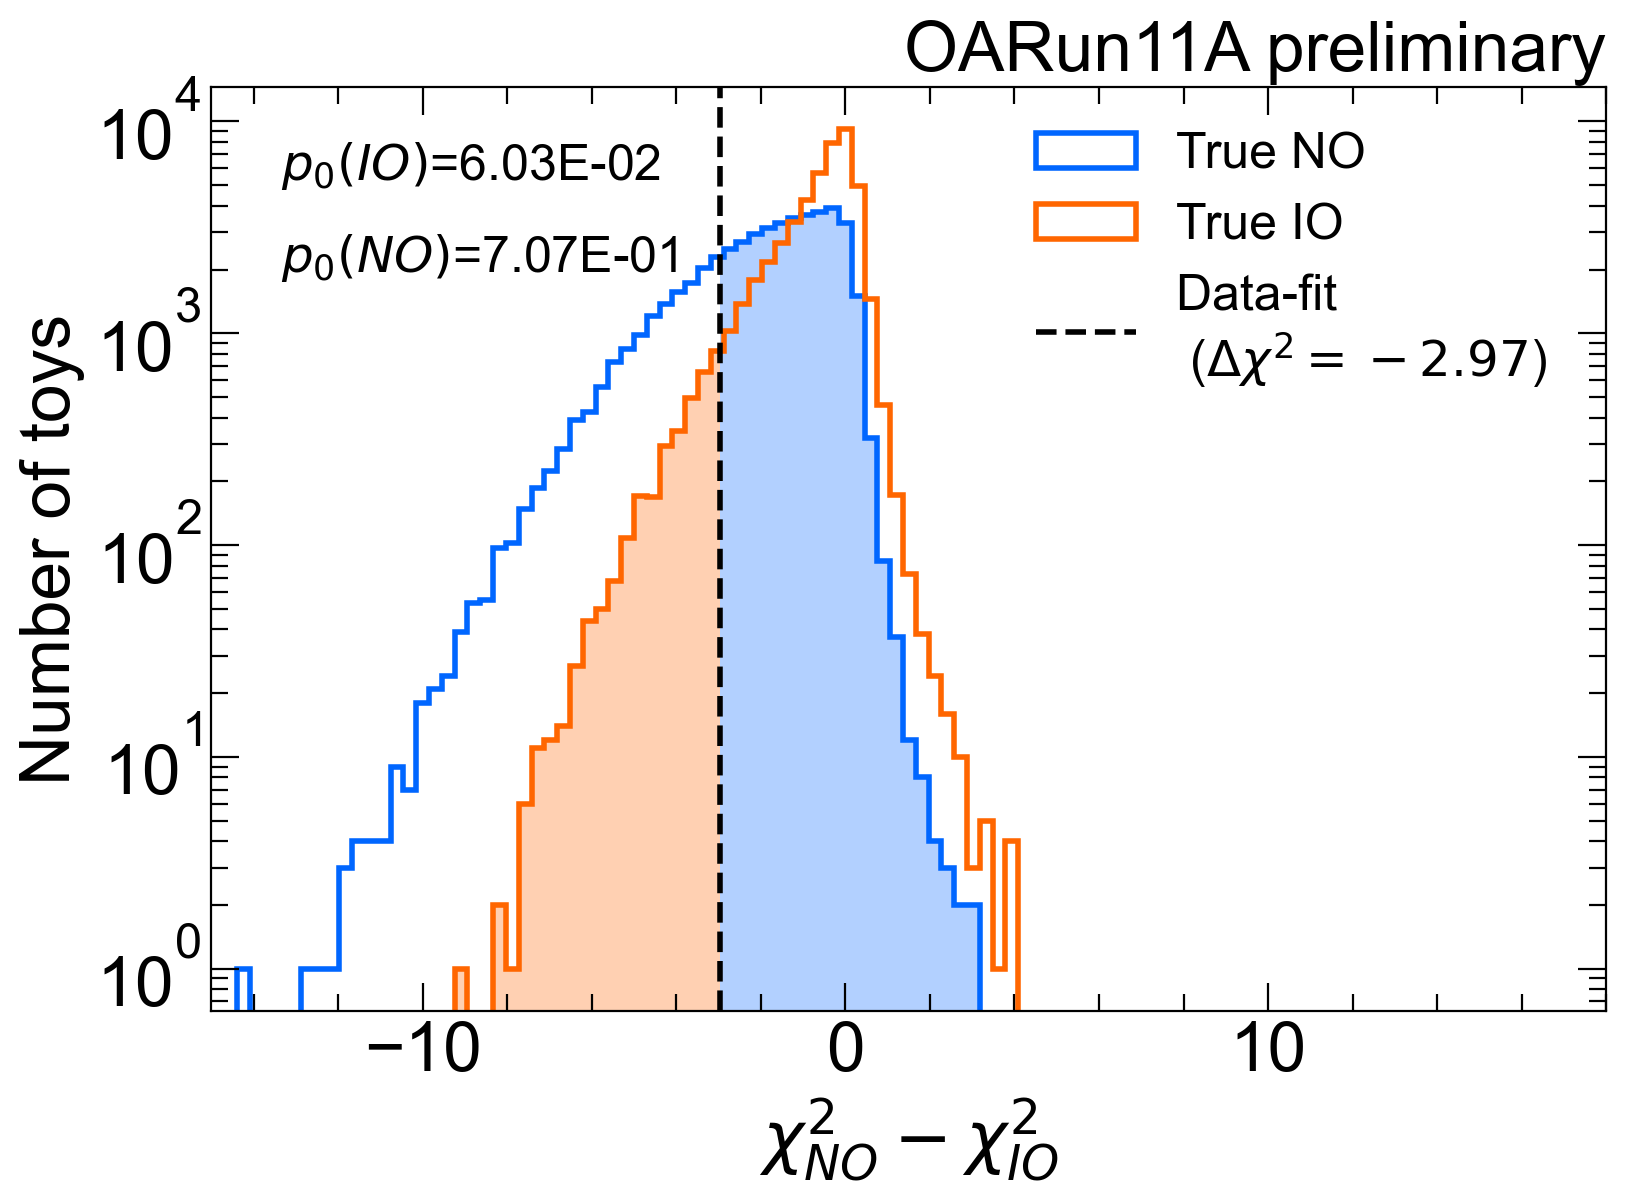

In [22]:
plot_pvalues.plot_MO_dchi2(base_dir_post_true_no, base_dir_post_true_io, base_dir_data, 
                           'Posterior', outdir_path, outdir_files_path, save=True)

### Fixed $\delta_{CP}$

Here toy fits for FC dCP are reused. To perform the MO testing, the marginalisation over delta_cp grid is performed in addition.

Number of entries in 'MargTemplate': 40.
No continous parameters are found. Hopefully you do p-values studies
Grid sizes: [1] for parameters ['none']
Number of entries in 'MargTemplate': 5100000.
Grid sizes: [51] for parameters ['delta']
Number of entries in 'MargTemplate': 5100000.
Grid sizes: [51] for parameters ['delta']
Number of entries in 'MargTemplate': 40.
No continous parameters are found. Hopefully you do p-values studies
Grid sizes: [1] for parameters ['none']
Number of entries in 'MargTemplate': 5100000.
Grid sizes: [51] for parameters ['delta']
Number of entries in 'MargTemplate': 5100000.
Grid sizes: [51] for parameters ['delta']
Number of entries in 'MargTemplate': 40.
No continous parameters are found. Hopefully you do p-values studies
Grid sizes: [1] for parameters ['none']
Number of entries in 'MargTemplate': 5100000.
Grid sizes: [51] for parameters ['delta']
Number of entries in 'MargTemplate': 5100000.
Grid sizes: [51] for parameters ['delta']
Number of entries in '

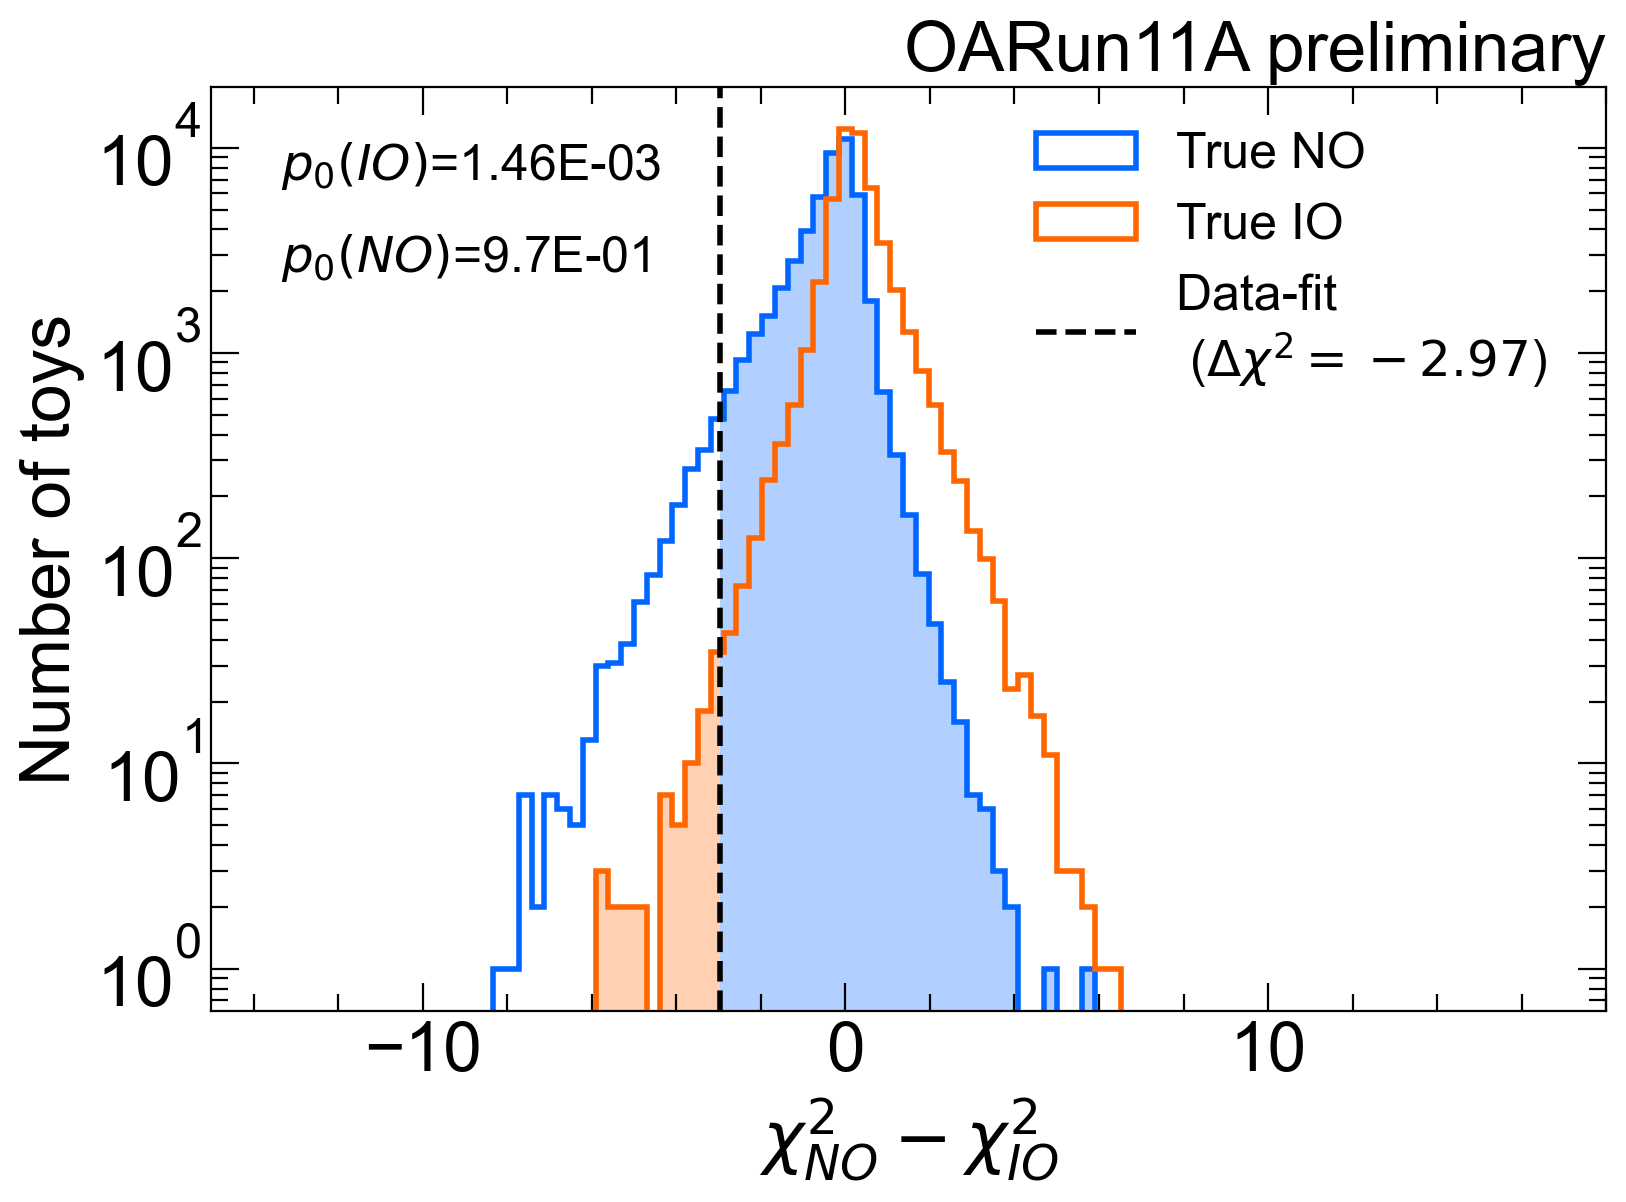

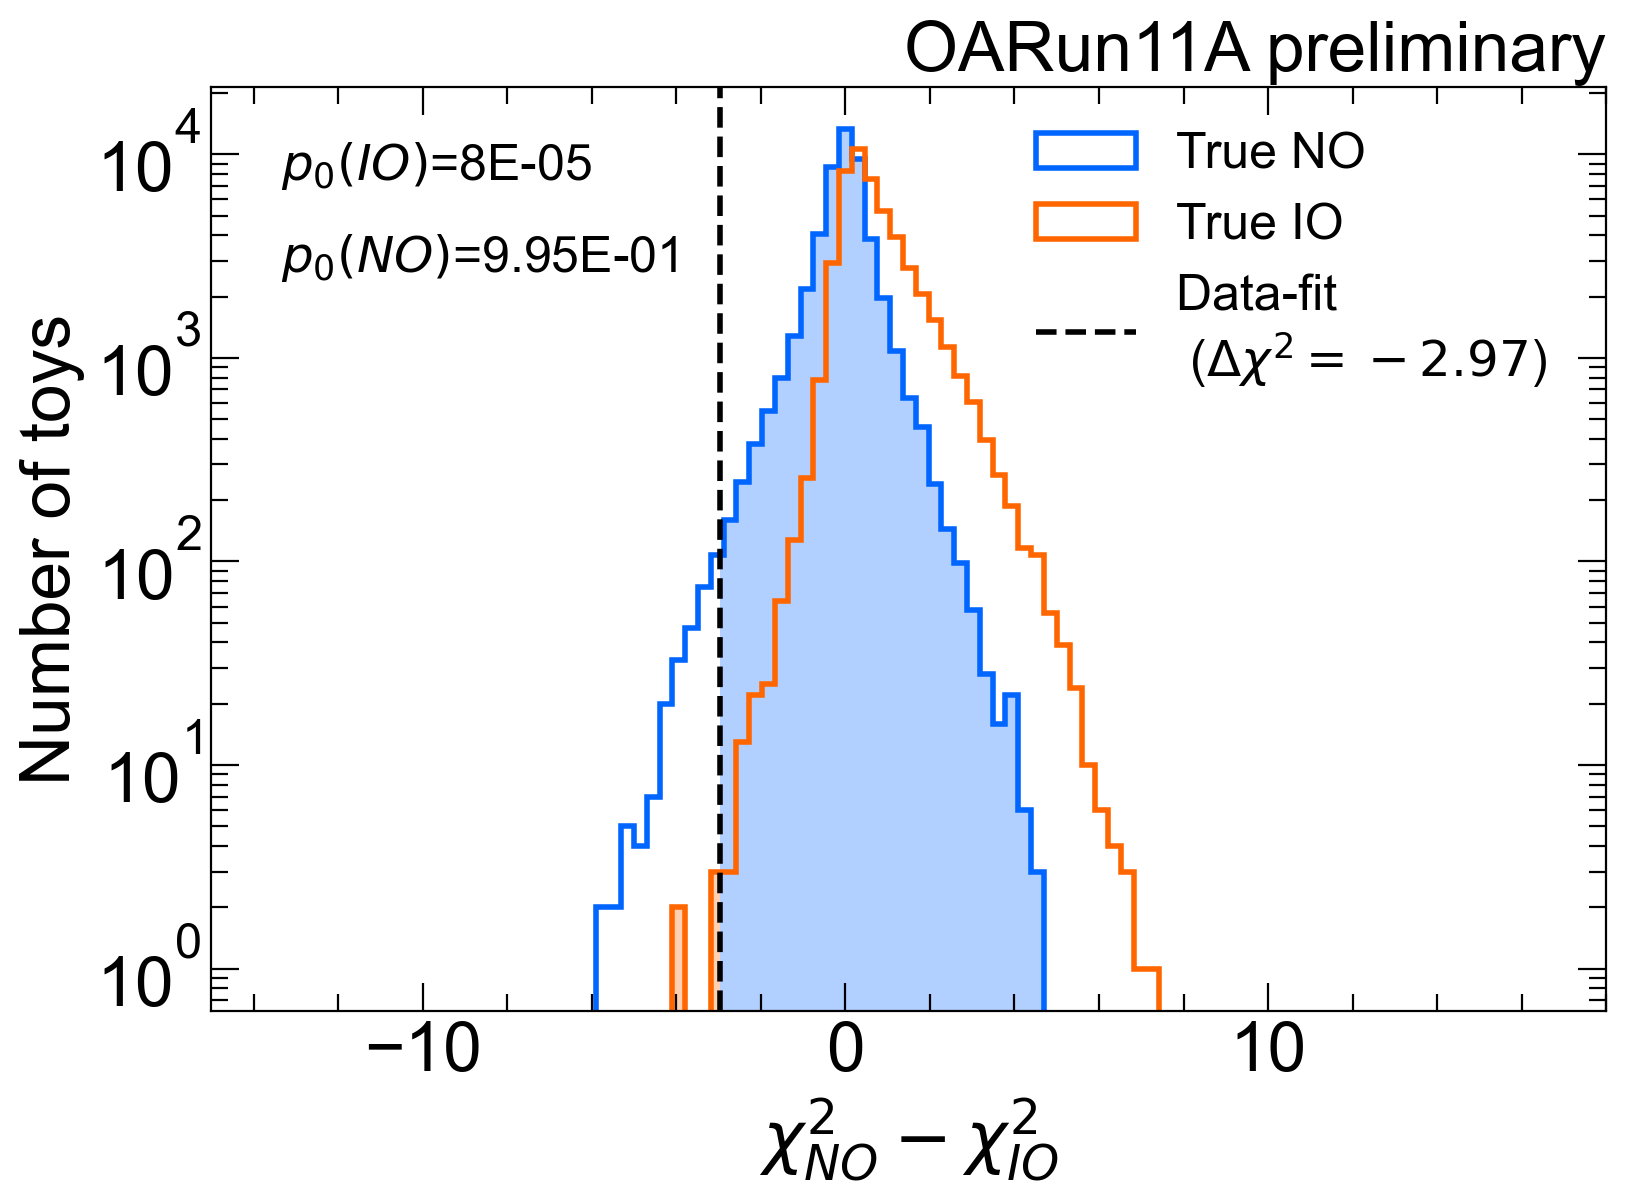

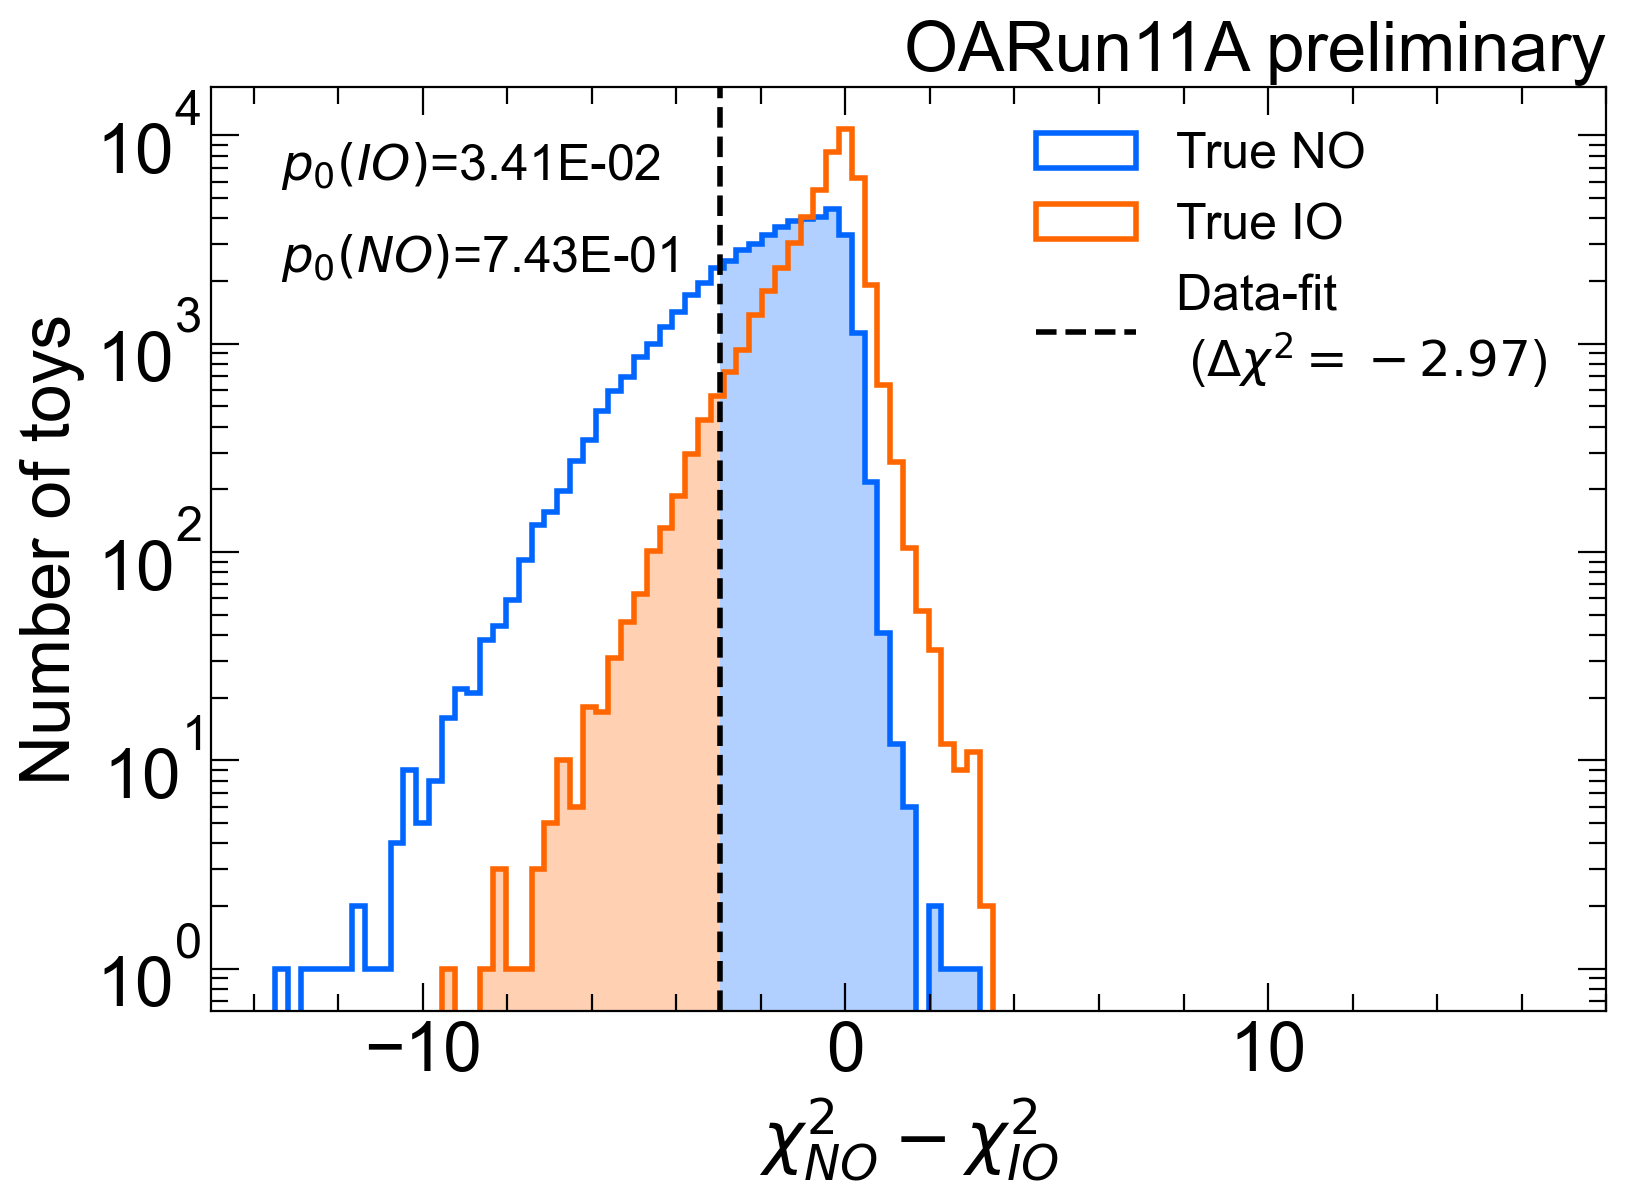

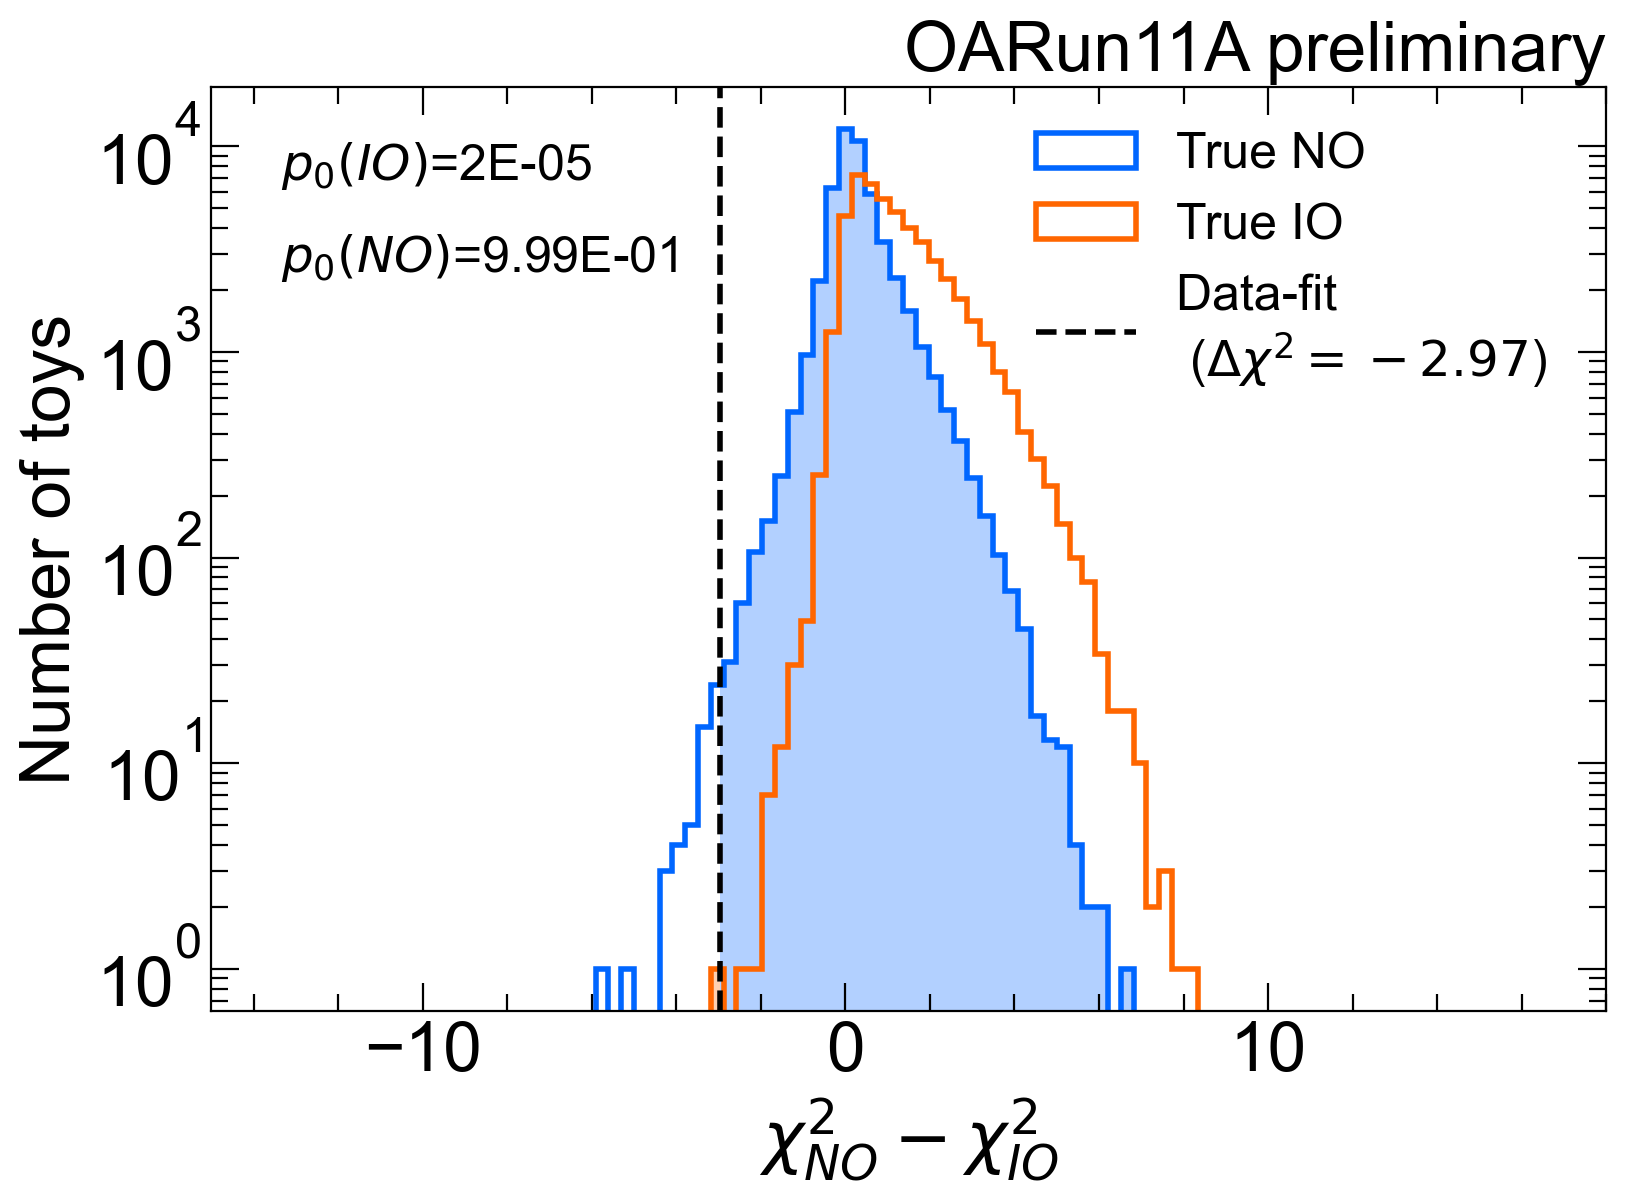

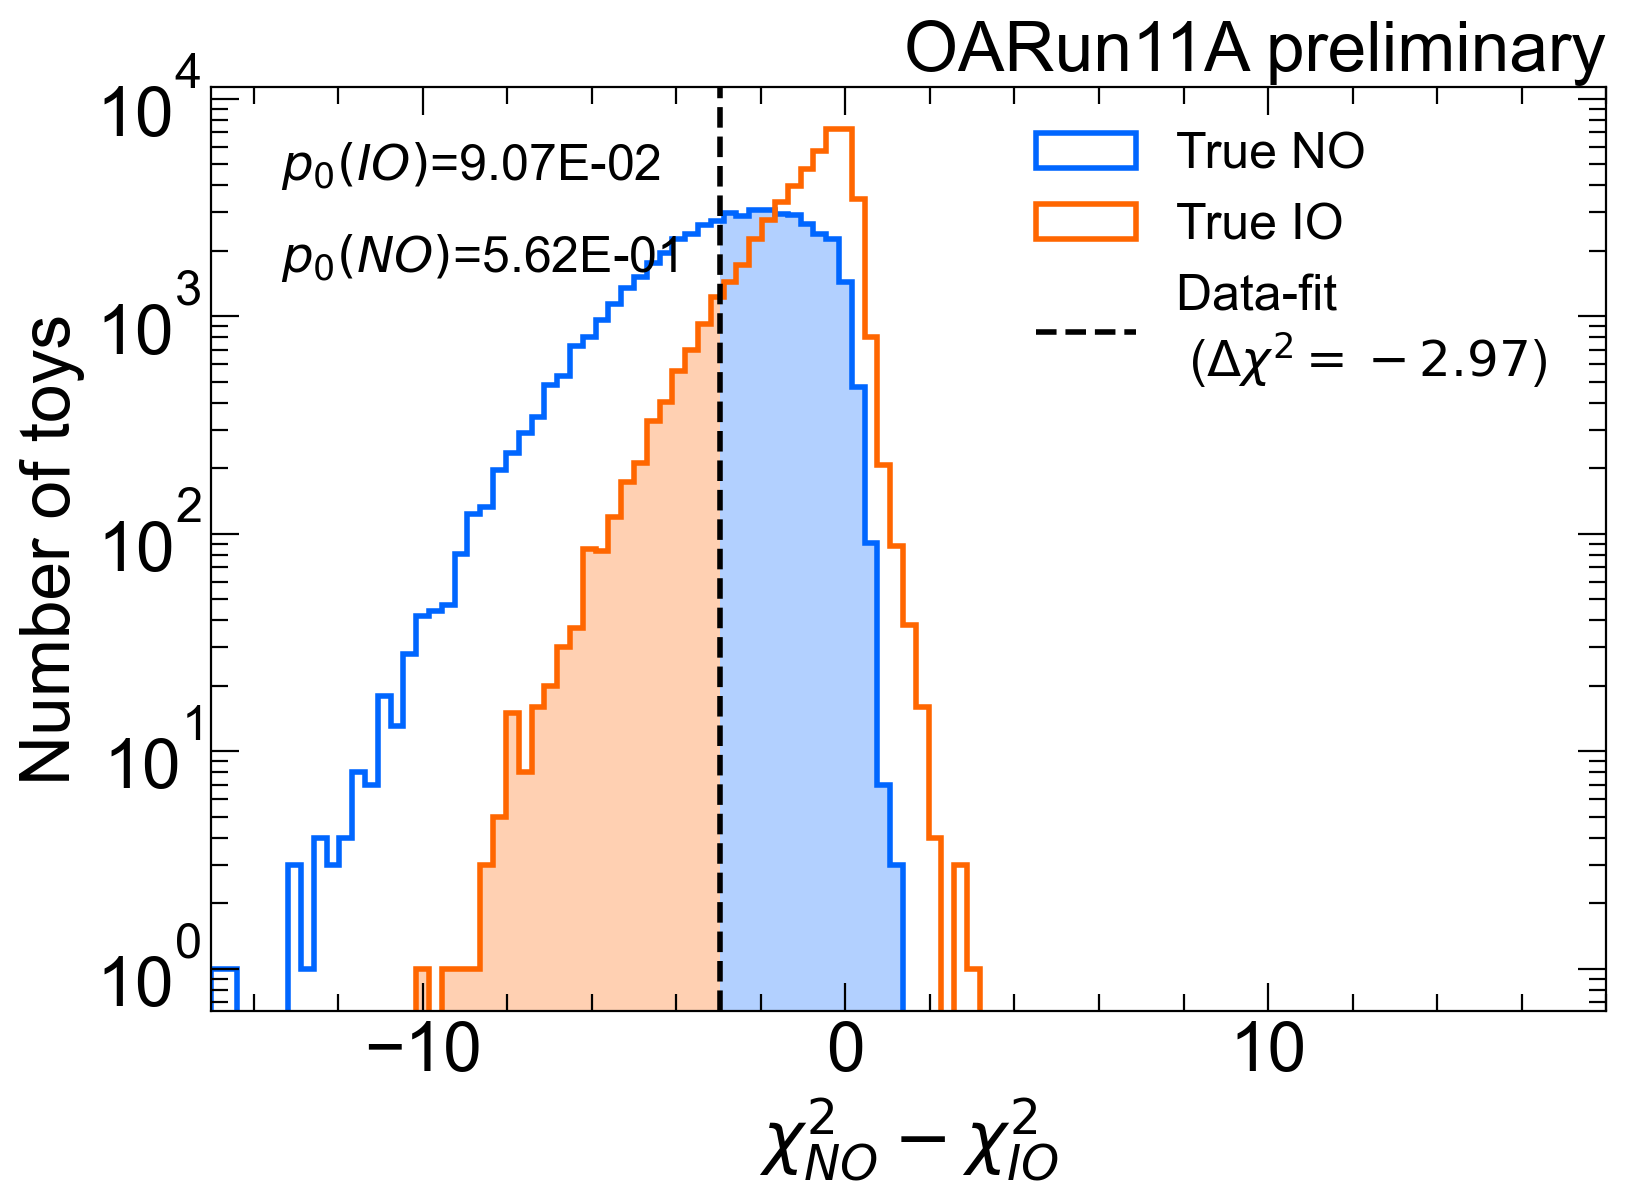

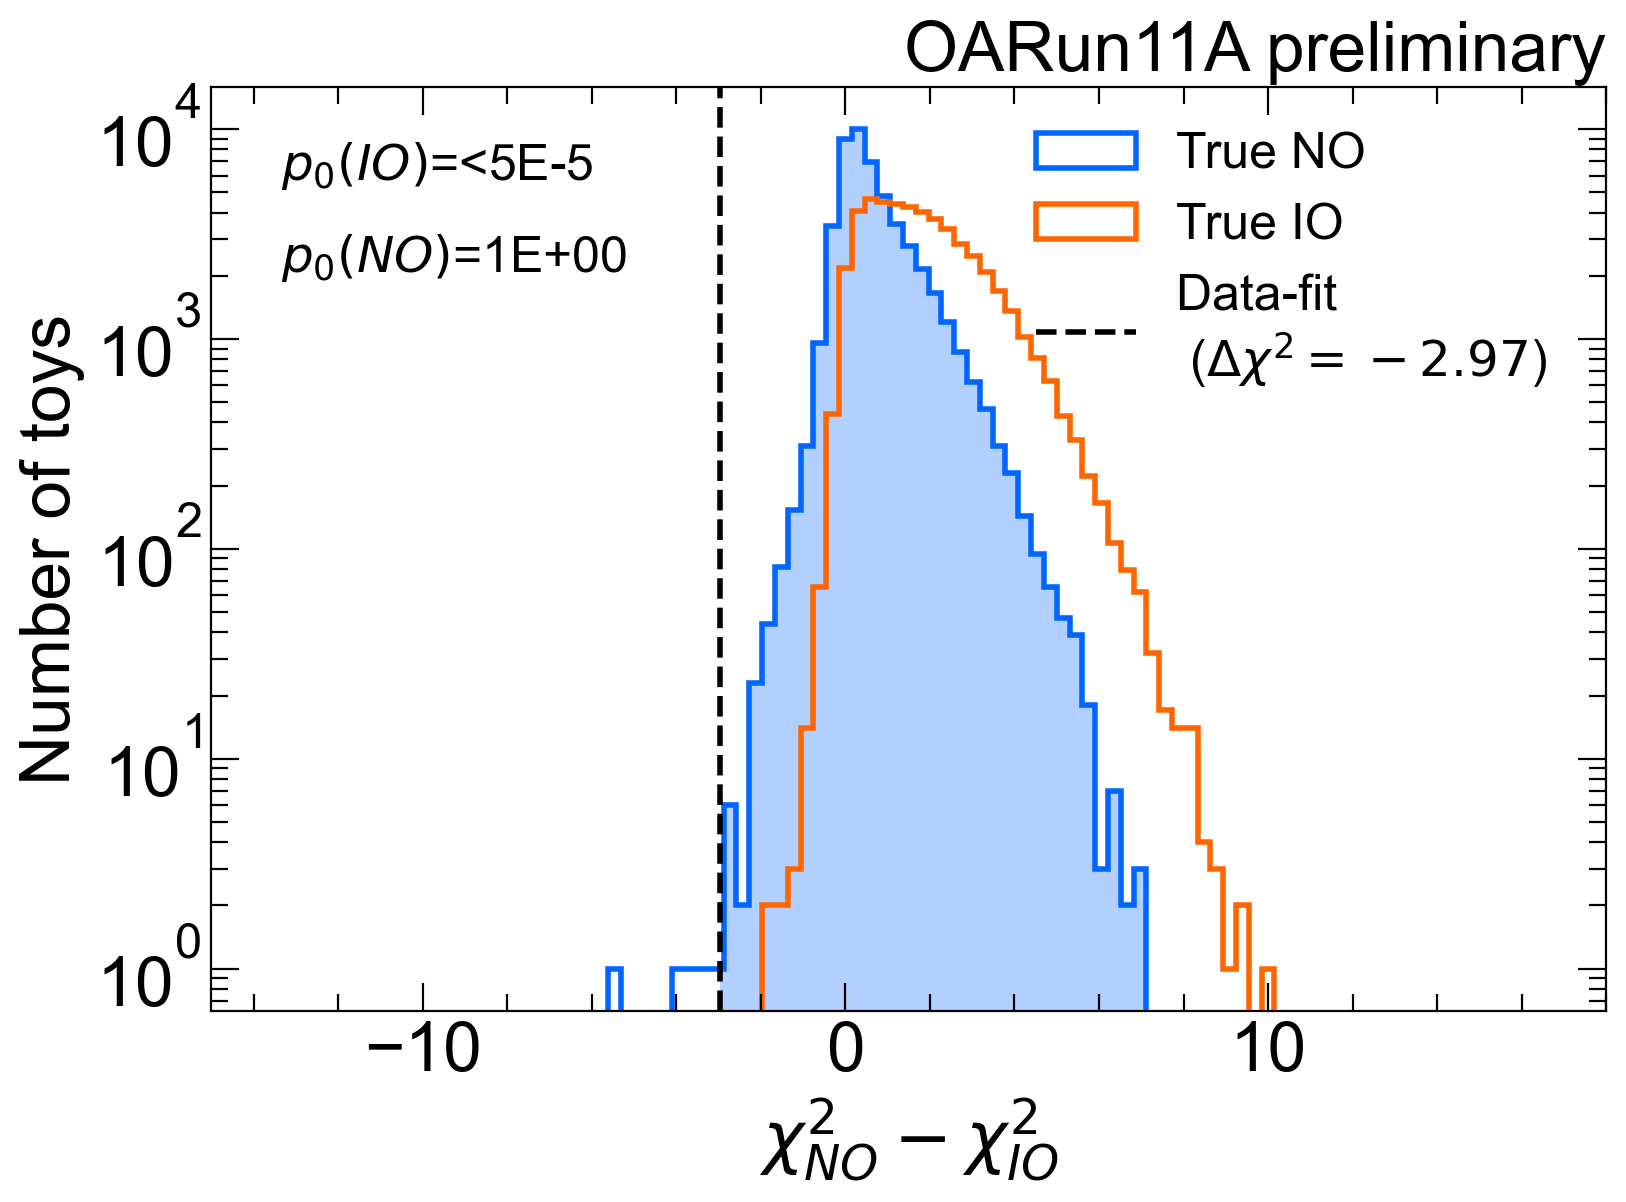

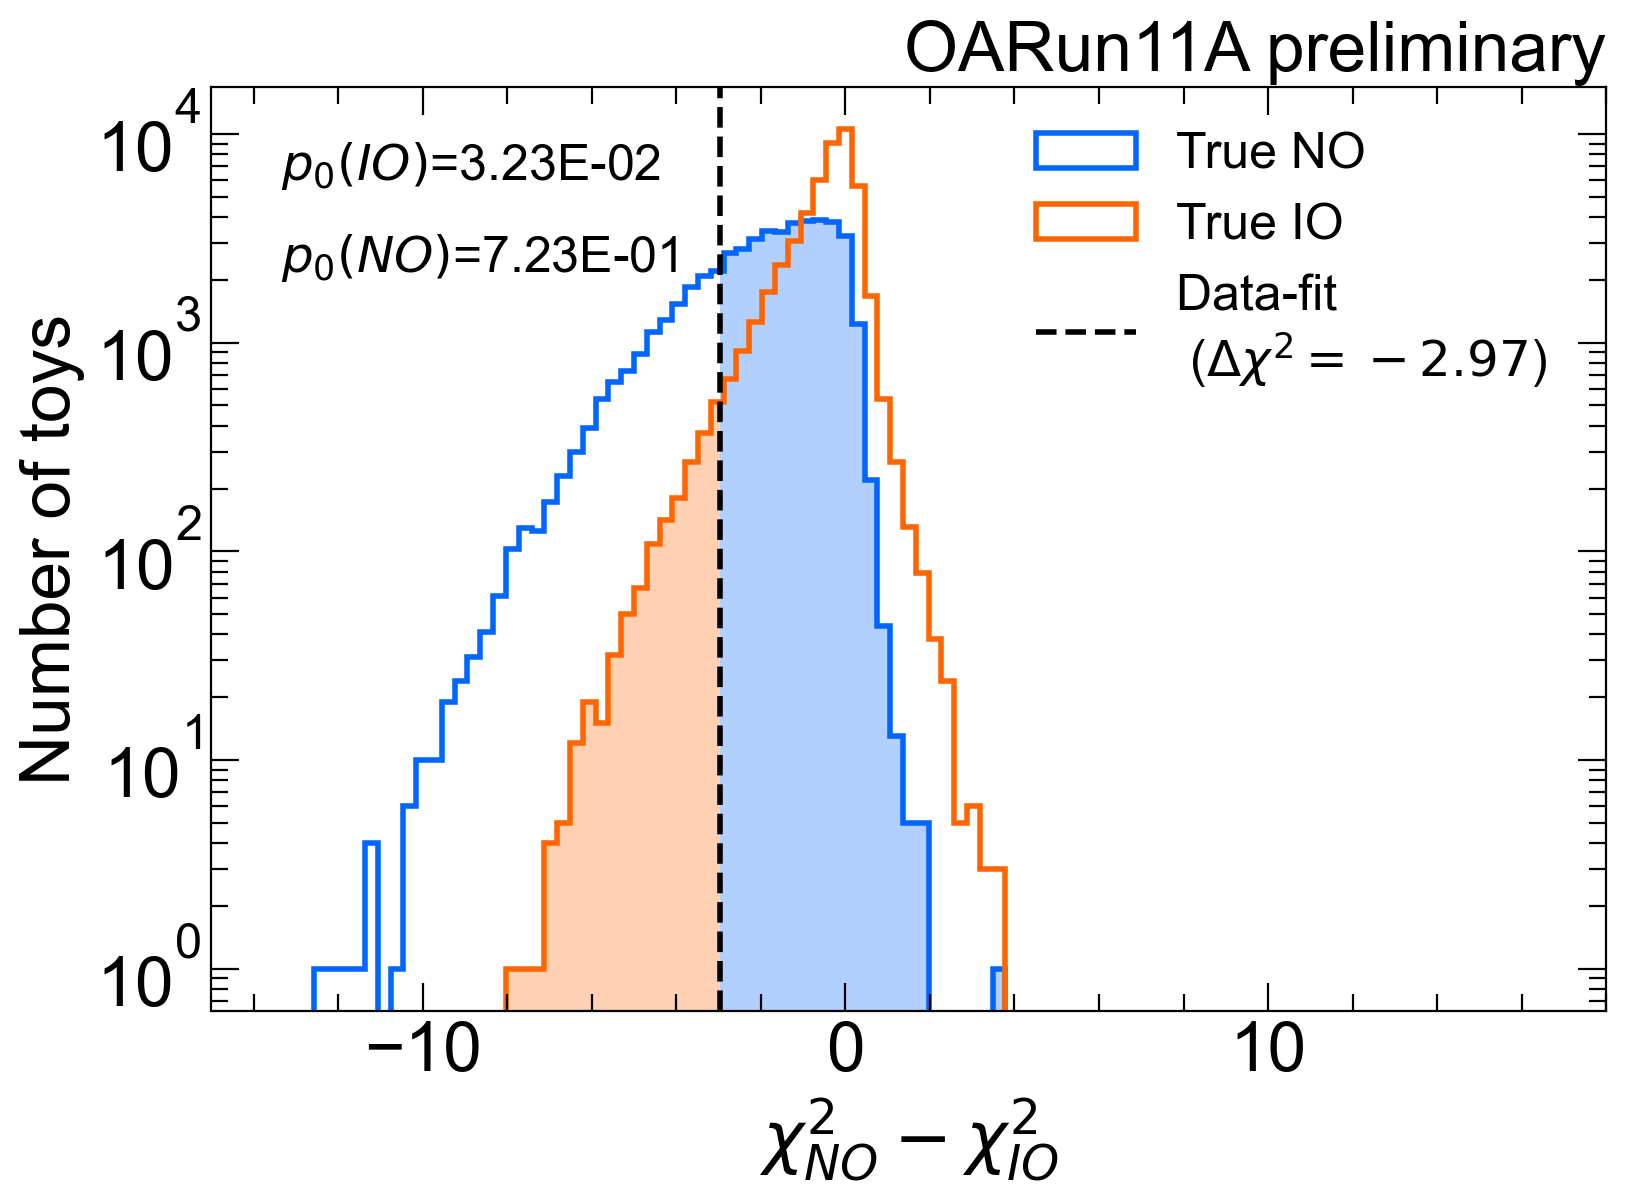

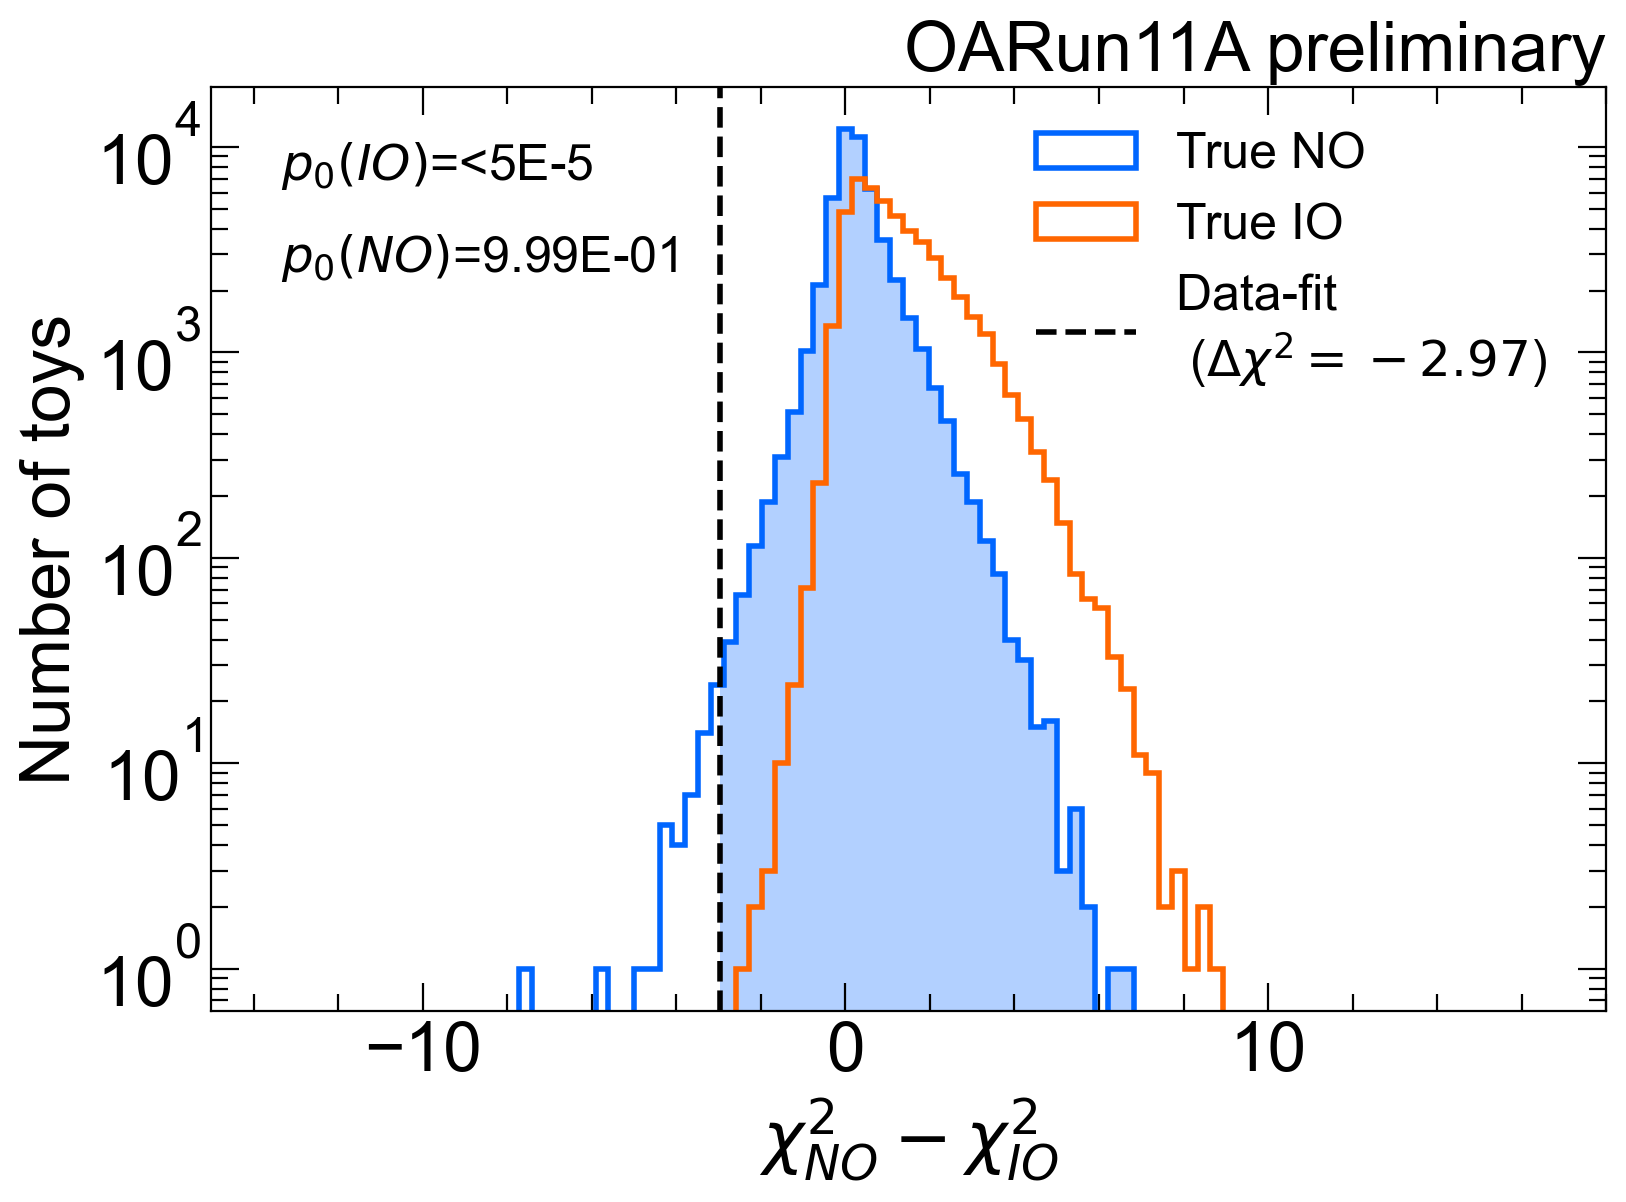

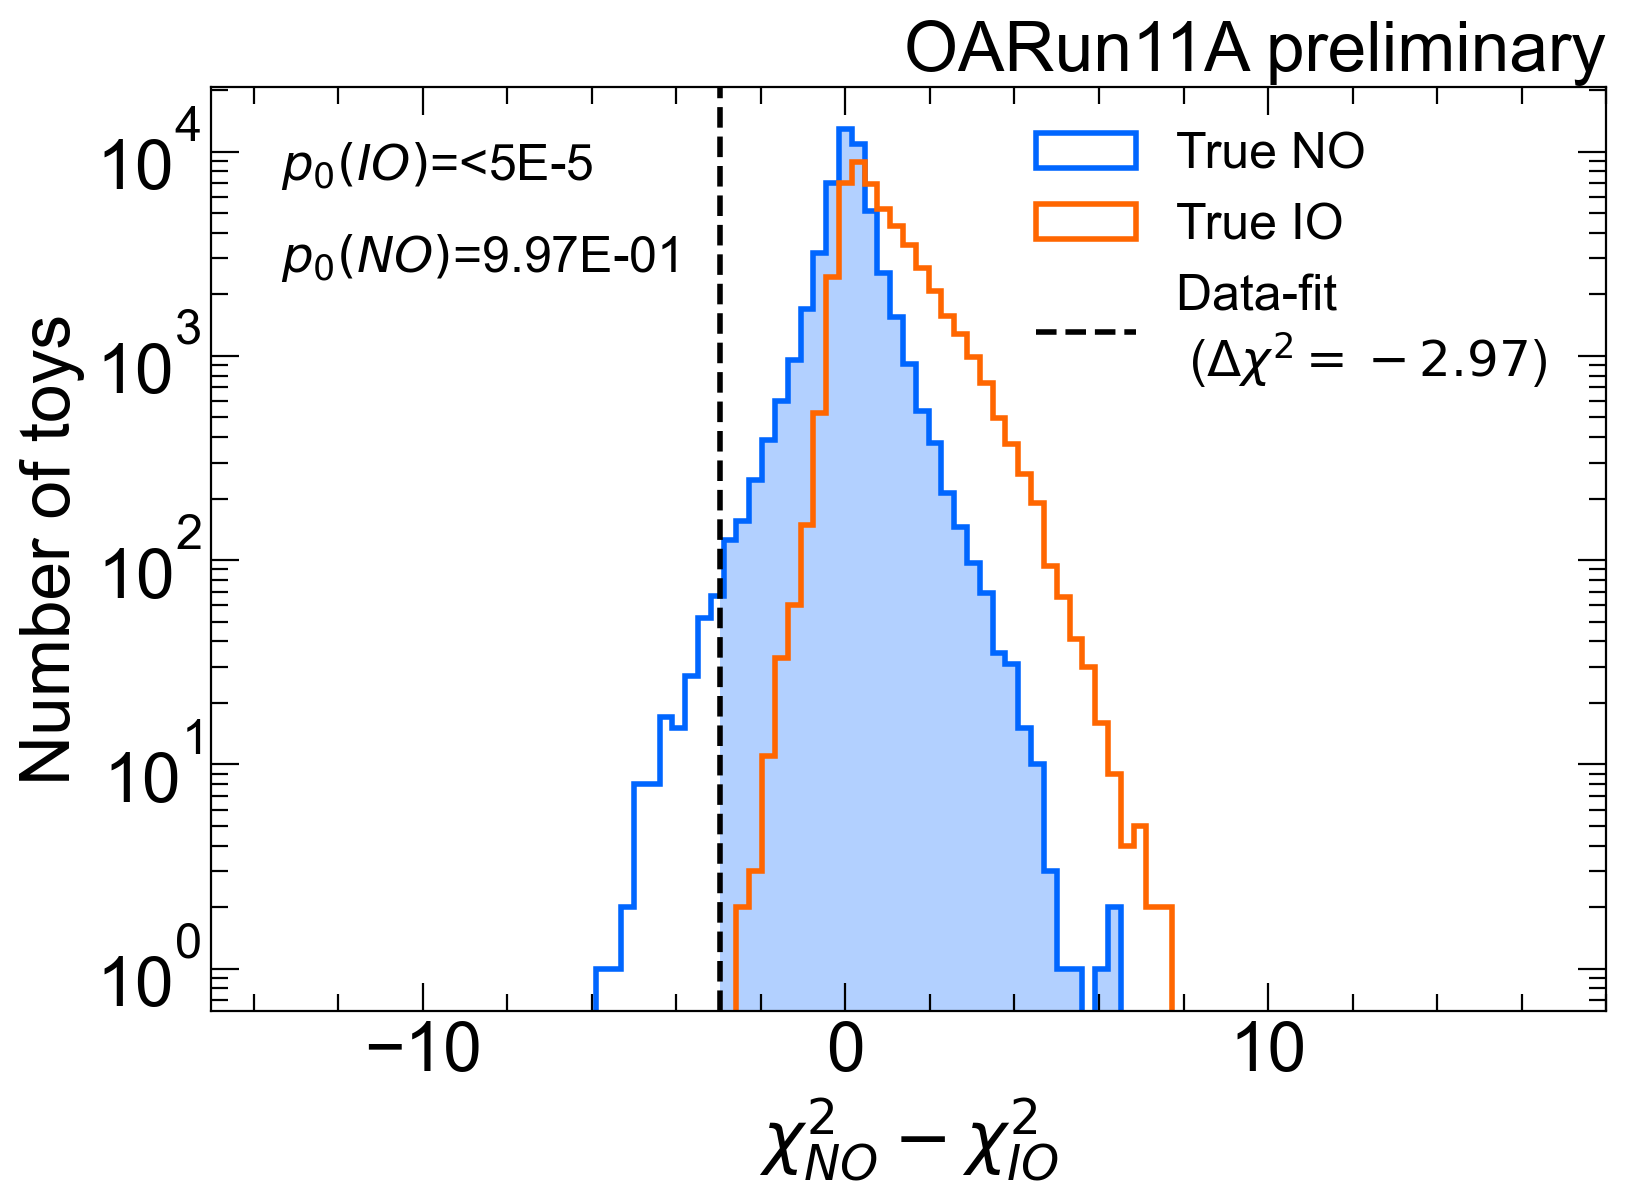

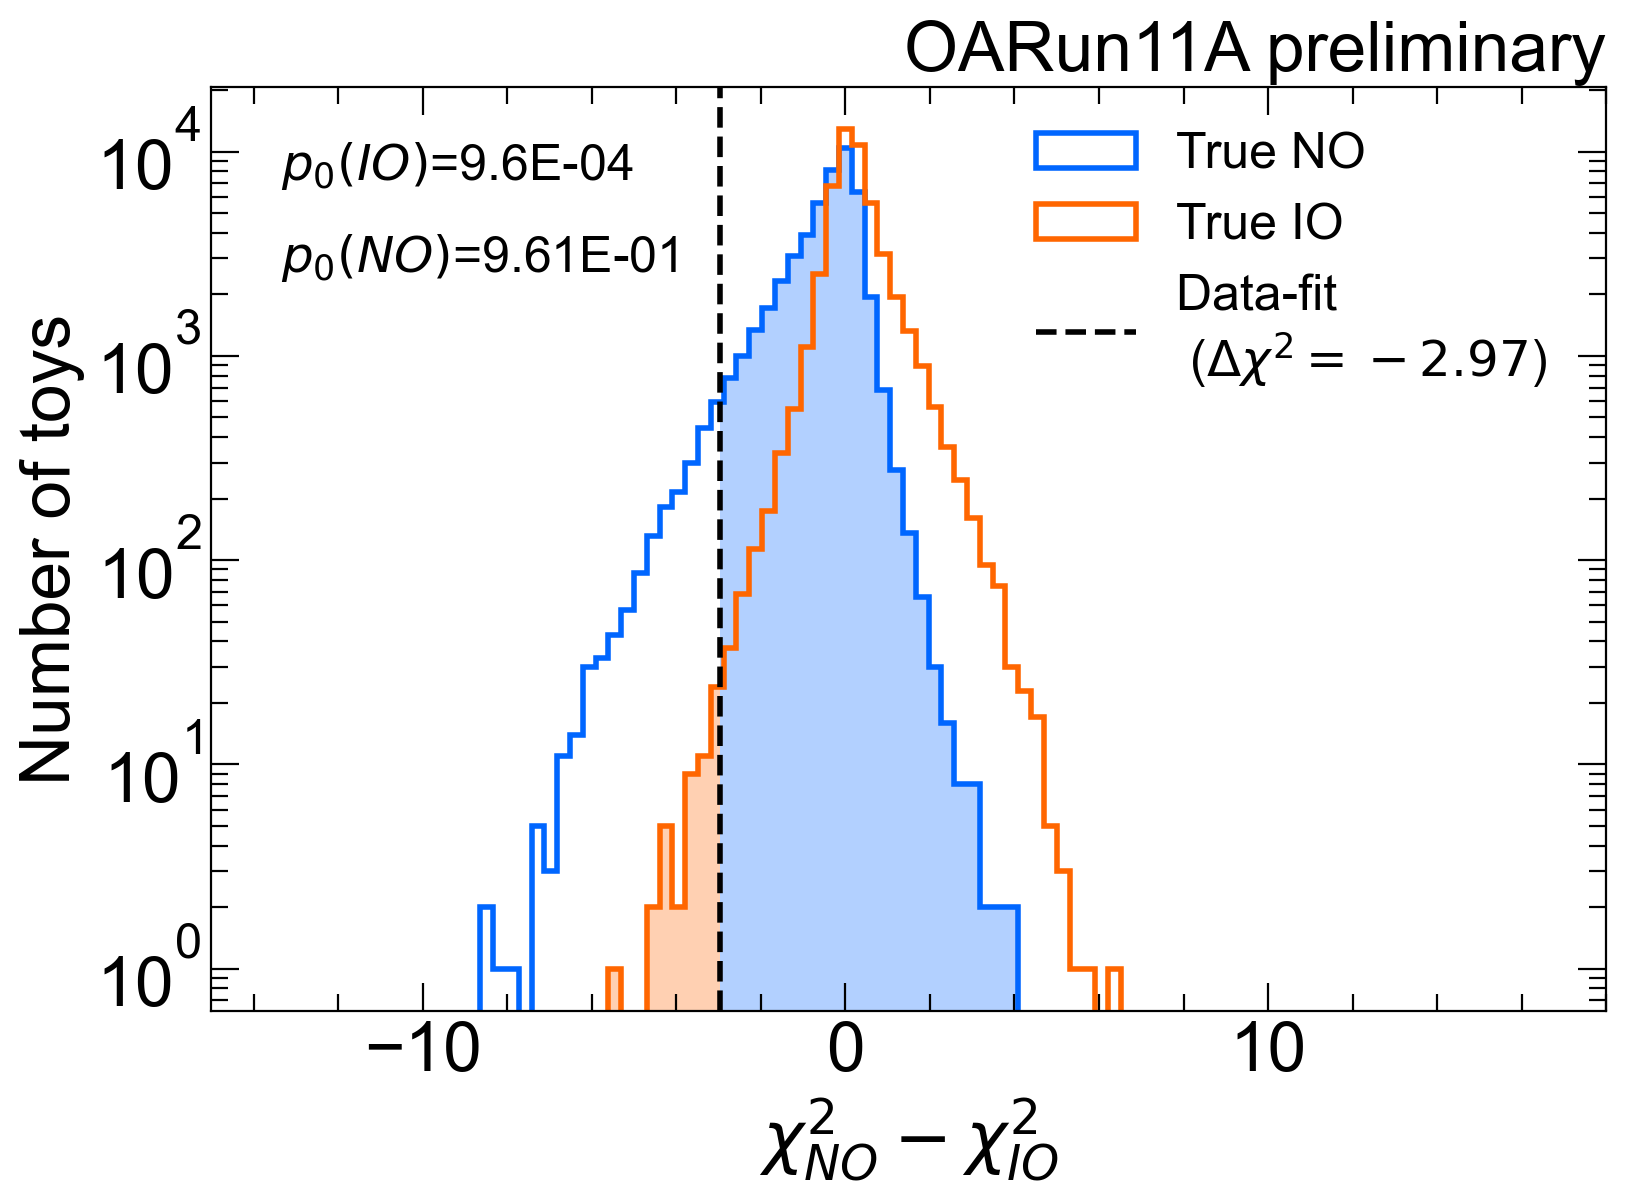

In [27]:
for true_dcp_str in param_values_FC['delta']:
    plot_pvalues.plot_MO_dchi2(base_dir_fixed_true_no.format(true_dcp_str=true_dcp_str), 
                               base_dir_fixed_true_io.format(true_dcp_str=true_dcp_str), base_dir_data, 
                               true_dcp_str, outdir_path, outdir_files_path, save=True)

## Octant studies

In [87]:
base_dir_data = f"{indir_path}/MargTemplates_DataFit_sin223_100k_p-theta_mode_0"

#for Posterior hypothesis
base_dir_toys_true_lo_no = f"{indir_path}/FC/MargTemplates_OA2023_GoF_Thesis_50k_sin223_100k_GOF_NH_LO_mode_0"
base_dir_toys_true_lo_io = f"{indir_path}/FC/MargTemplates_OA2023_GoF_Thesis_50k_sin223_100k_GOF_IH_LO_mode_0"
base_dir_toys_true_uo_no = f"{indir_path}/FC/MargTemplates_OA2023_GoF_Thesis_50k_sin223_100k_GOF_NH_UO_mode_0"
base_dir_toys_true_uo_io = f"{indir_path}/FC/MargTemplates_OA2023_GoF_Thesis_50k_sin223_100k_GOF_IH_UO_mode_0"

#for fixed sin2223
base_dir_toys_true_lo_no_fixed = f"{indir_path}/FC/MargTemplates_LucileThesis_fit_FCsin223_{{sin223}}_0_FullSyst_wRC_etheta_ptheta_sin223"
base_dir_toys_true_lo_io_fixed = f"{indir_path}/FC/MargTemplates_LucileThesis_fit_FCsin223_{{sin223}}_1_FullSyst_wRC_etheta_ptheta_sin223"
base_dir_toys_true_uo_no_fixed = f"{indir_path}/FC/MargTemplates_LucileThesis_fit_FCsin223_{{sin223}}_0_FullSyst_wRC_etheta_ptheta_sin223"
base_dir_toys_true_uo_io_fixed = f"{indir_path}/FC/MargTemplates_LucileThesis_fit_FCsin223_{{sin223}}_1_FullSyst_wRC_etheta_ptheta_sin223"


### Plot $\Delta \chi^2$ distribution

Helpful to illustrate how chi2(UO) and chi2(LO) are constructed

Number of entries in 'MargTemplate': 3240.
Grid sizes: [81] for parameters ['sin223']


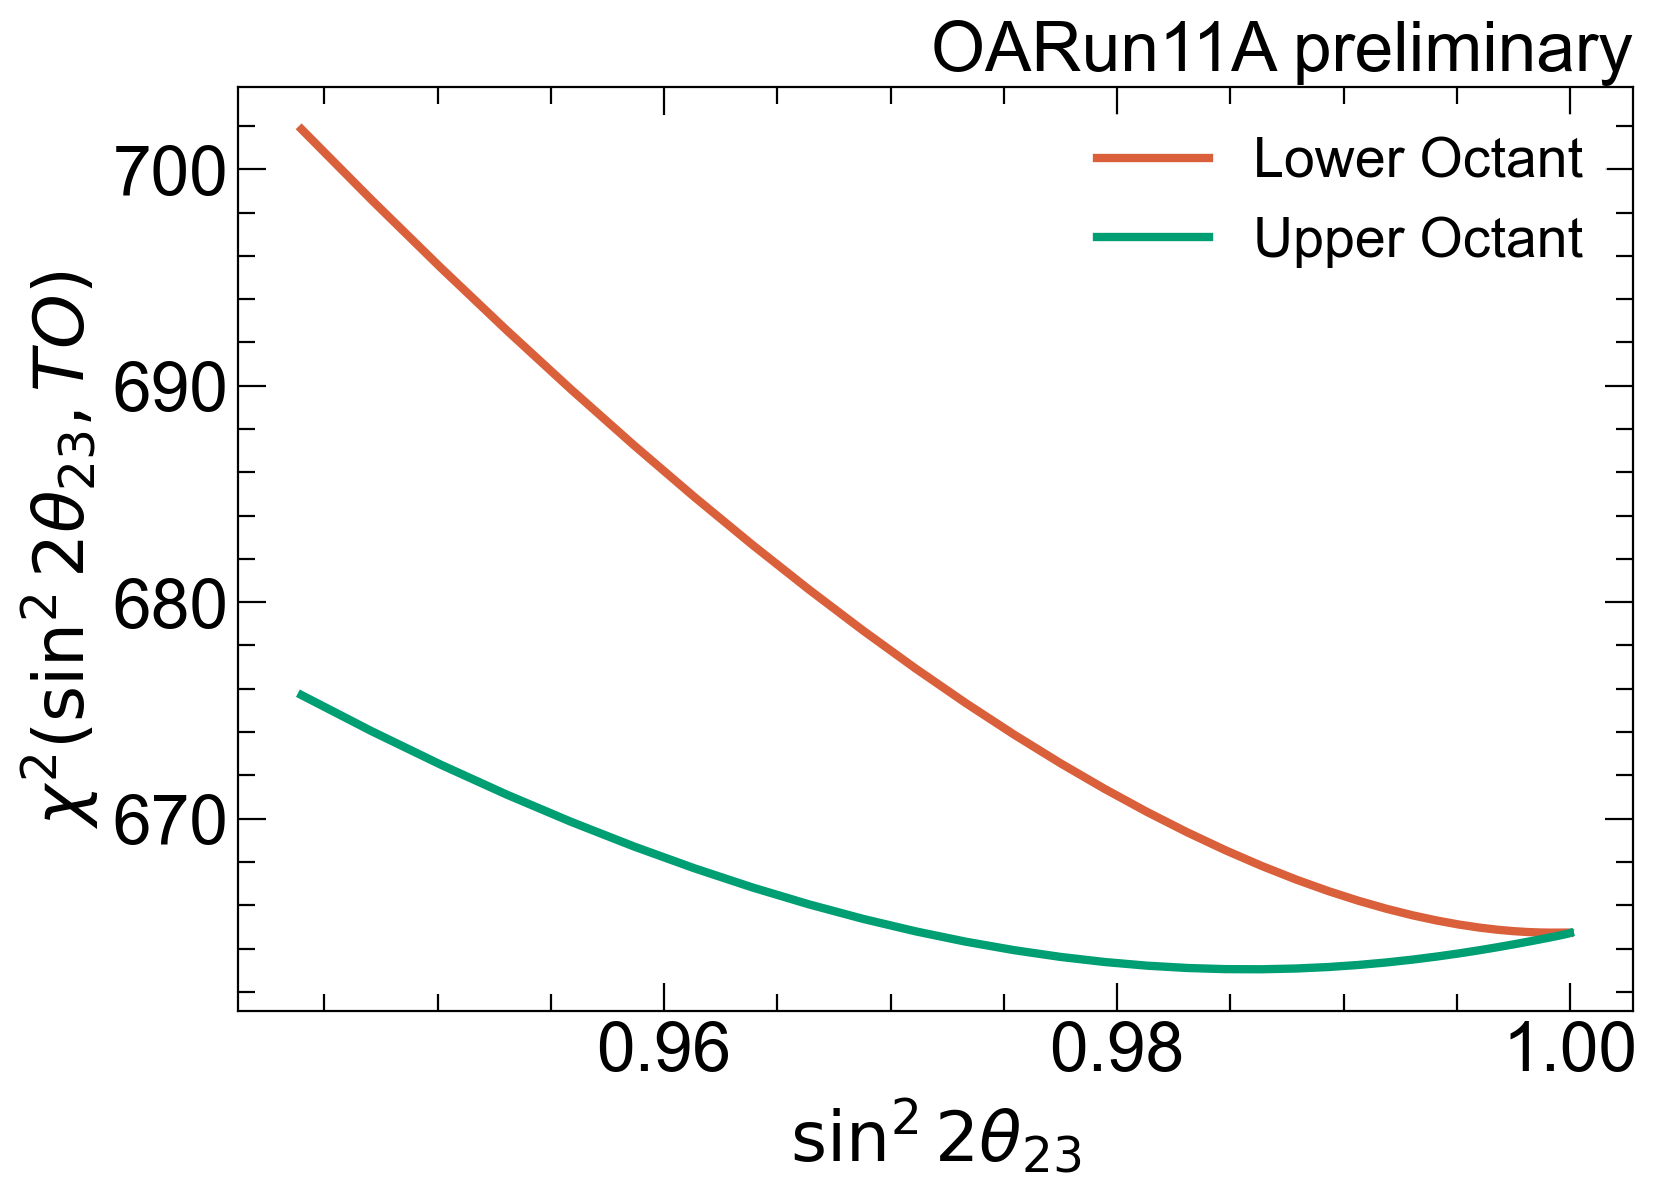

In [60]:
plot_pvalues.plot_dchi2_foroctant(base_dir_data, 'datafit', prior='s2223', save=True)

### Posterior $\sin^2 2\theta_{23}$

Number of entries in 'MargTemplate': 3240.
Grid sizes: [81] for parameters ['sin223']
Number of entries in 'MargTemplate': 8100000.
Grid sizes: [81] for parameters ['sin223']
Number of entries in 'MargTemplate': 8100000.
Grid sizes: [81] for parameters ['sin223']
Number of entries in 'MargTemplate': 8100000.
Grid sizes: [81] for parameters ['sin223']
Number of entries in 'MargTemplate': 8100000.
Grid sizes: [81] for parameters ['sin223']


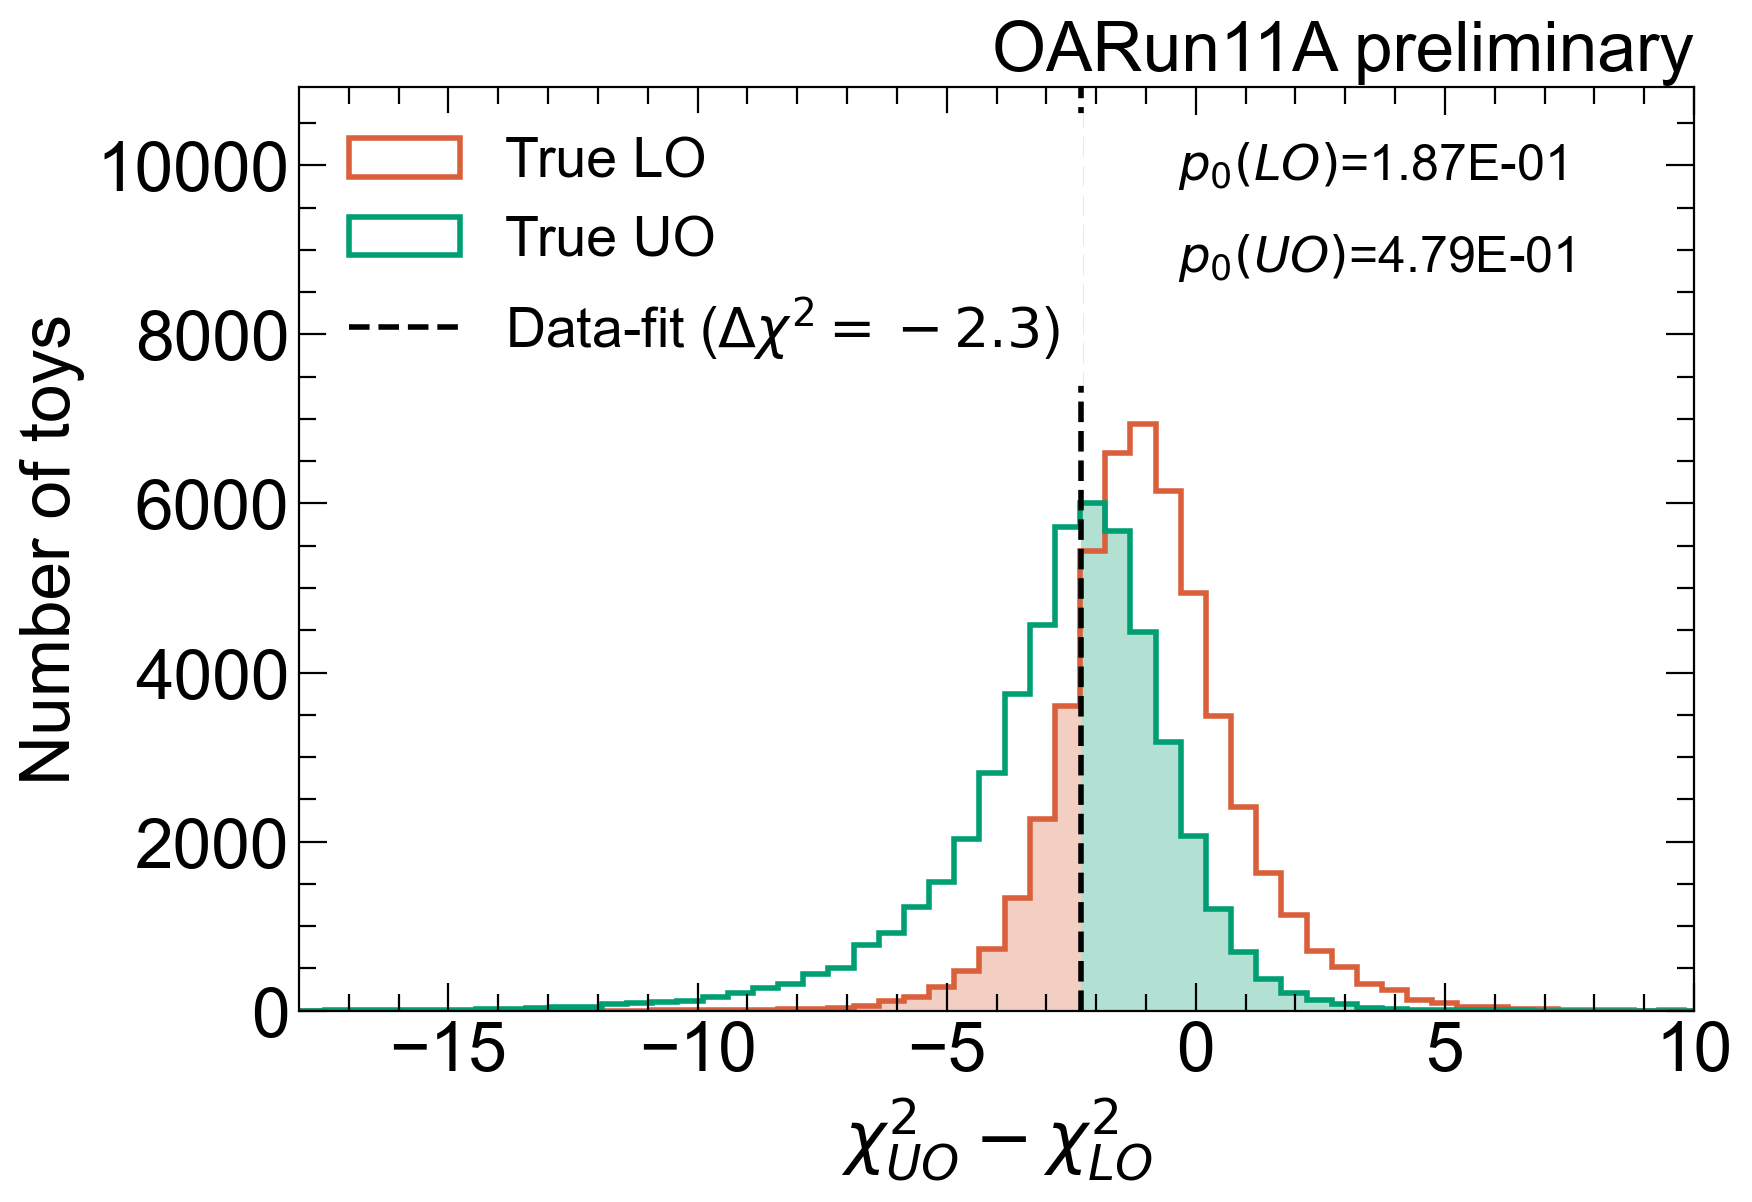

In [80]:
octant_pair = ['Post_LO', 'Post_UO']
prof = False
prior = 's223'
io_over_no_ratio = np.exp(-2.97)# Taken from MO studies (upper cells)

plot_pvalues.plot_octant_dchi2_distr(base_dir_toys_true_lo_no, base_dir_toys_true_lo_io, 
                               base_dir_toys_true_uo_no, base_dir_toys_true_uo_io, 
                               io_over_no_ratio,
                               base_dir_data, octant_pair, prior, outdir_path, outdir_files_path, 
                               prof=False, save_files=True, save_pdf=True)


### Fixed $\sin^2 2\theta_{23}$

Number of entries in 'MargTemplate': 3240.
Grid sizes: [81] for parameters ['sin223']
Number of entries in 'MargTemplate': 3240000.
Grid sizes: [81] for parameters ['sin223']
Number of entries in 'MargTemplate': 3240000.
Grid sizes: [81] for parameters ['sin223']
Number of entries in 'MargTemplate': 3240000.
Grid sizes: [81] for parameters ['sin223']
Number of entries in 'MargTemplate': 3240000.
Grid sizes: [81] for parameters ['sin223']
Number of entries in 'MargTemplate': 3240.
Grid sizes: [81] for parameters ['sin223']
Number of entries in 'MargTemplate': 3240000.
Grid sizes: [81] for parameters ['sin223']
Number of entries in 'MargTemplate': 3240000.
Grid sizes: [81] for parameters ['sin223']
Number of entries in 'MargTemplate': 3240000.
Grid sizes: [81] for parameters ['sin223']
Number of entries in 'MargTemplate': 3240000.
Grid sizes: [81] for parameters ['sin223']
Number of entries in 'MargTemplate': 3240.
Grid sizes: [81] for parameters ['sin223']
Number of entries in 'MargTemp

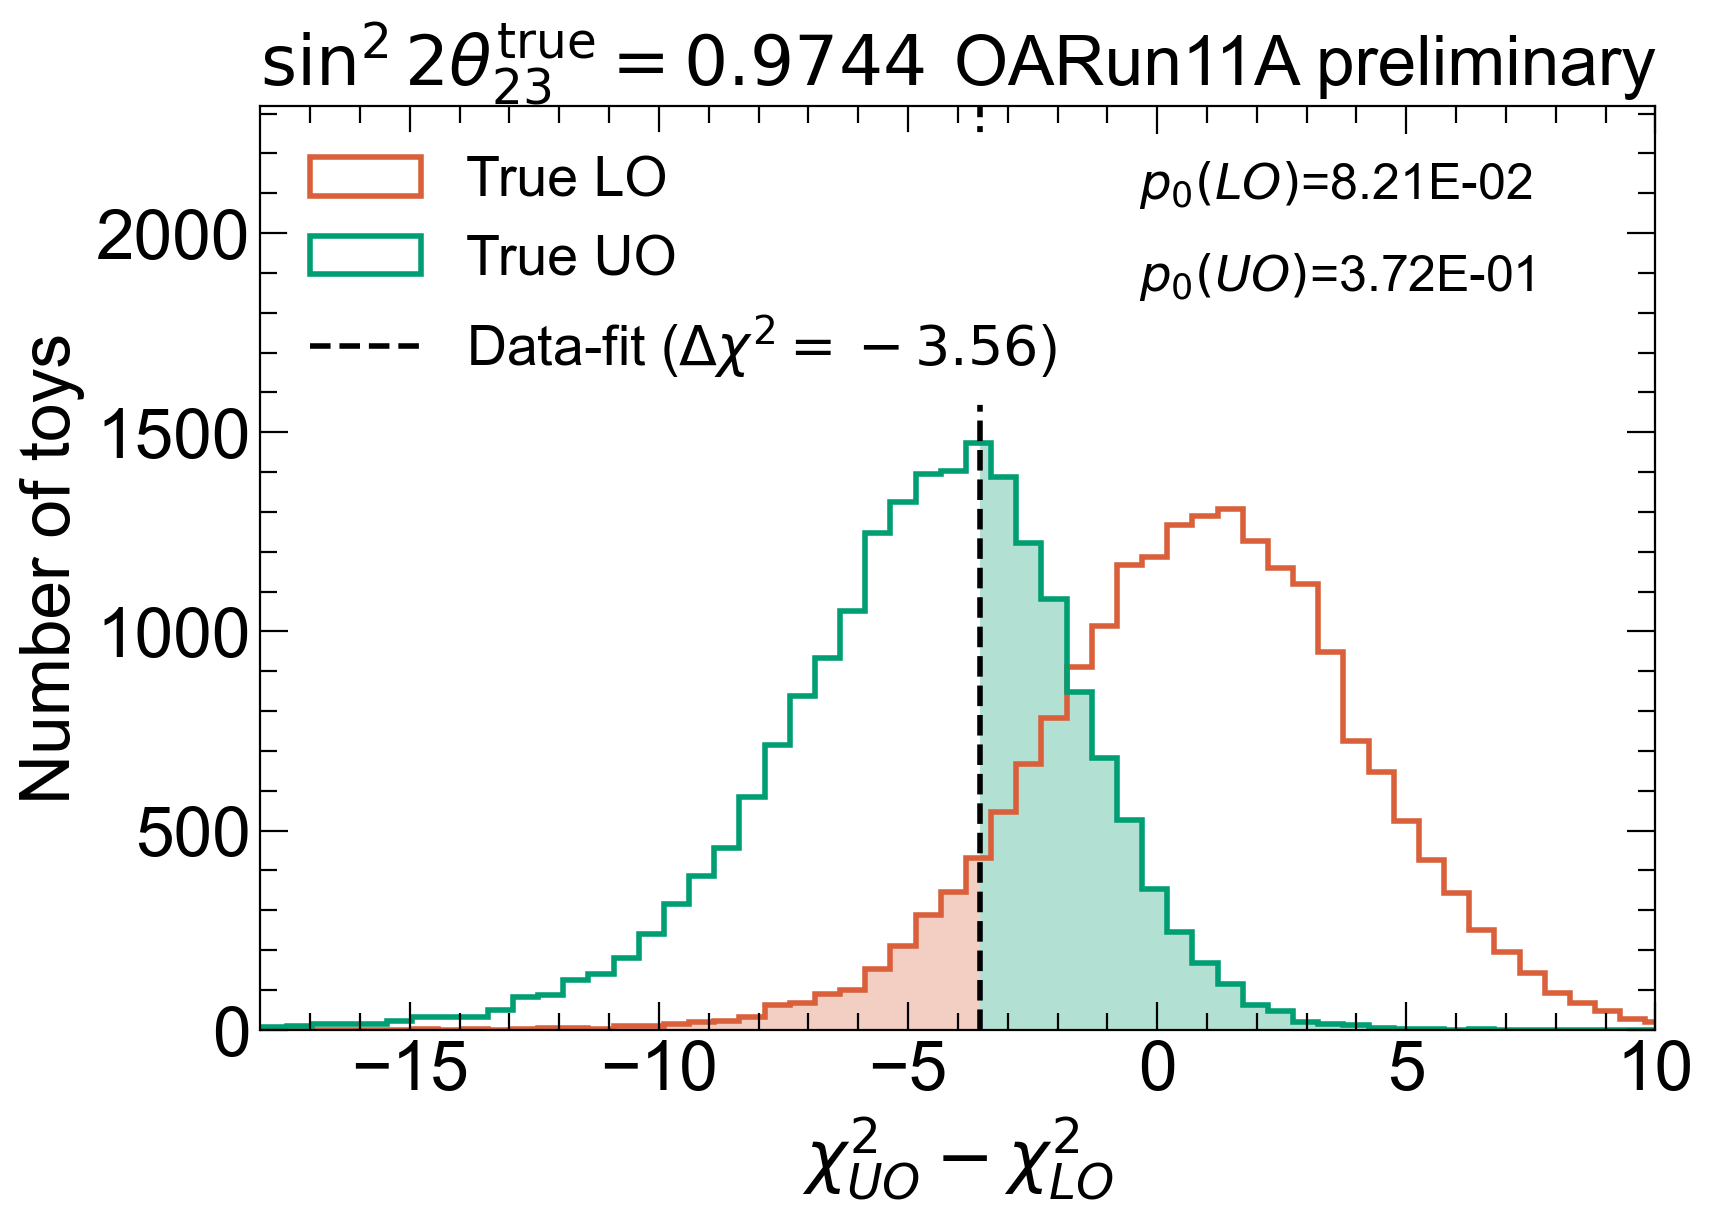

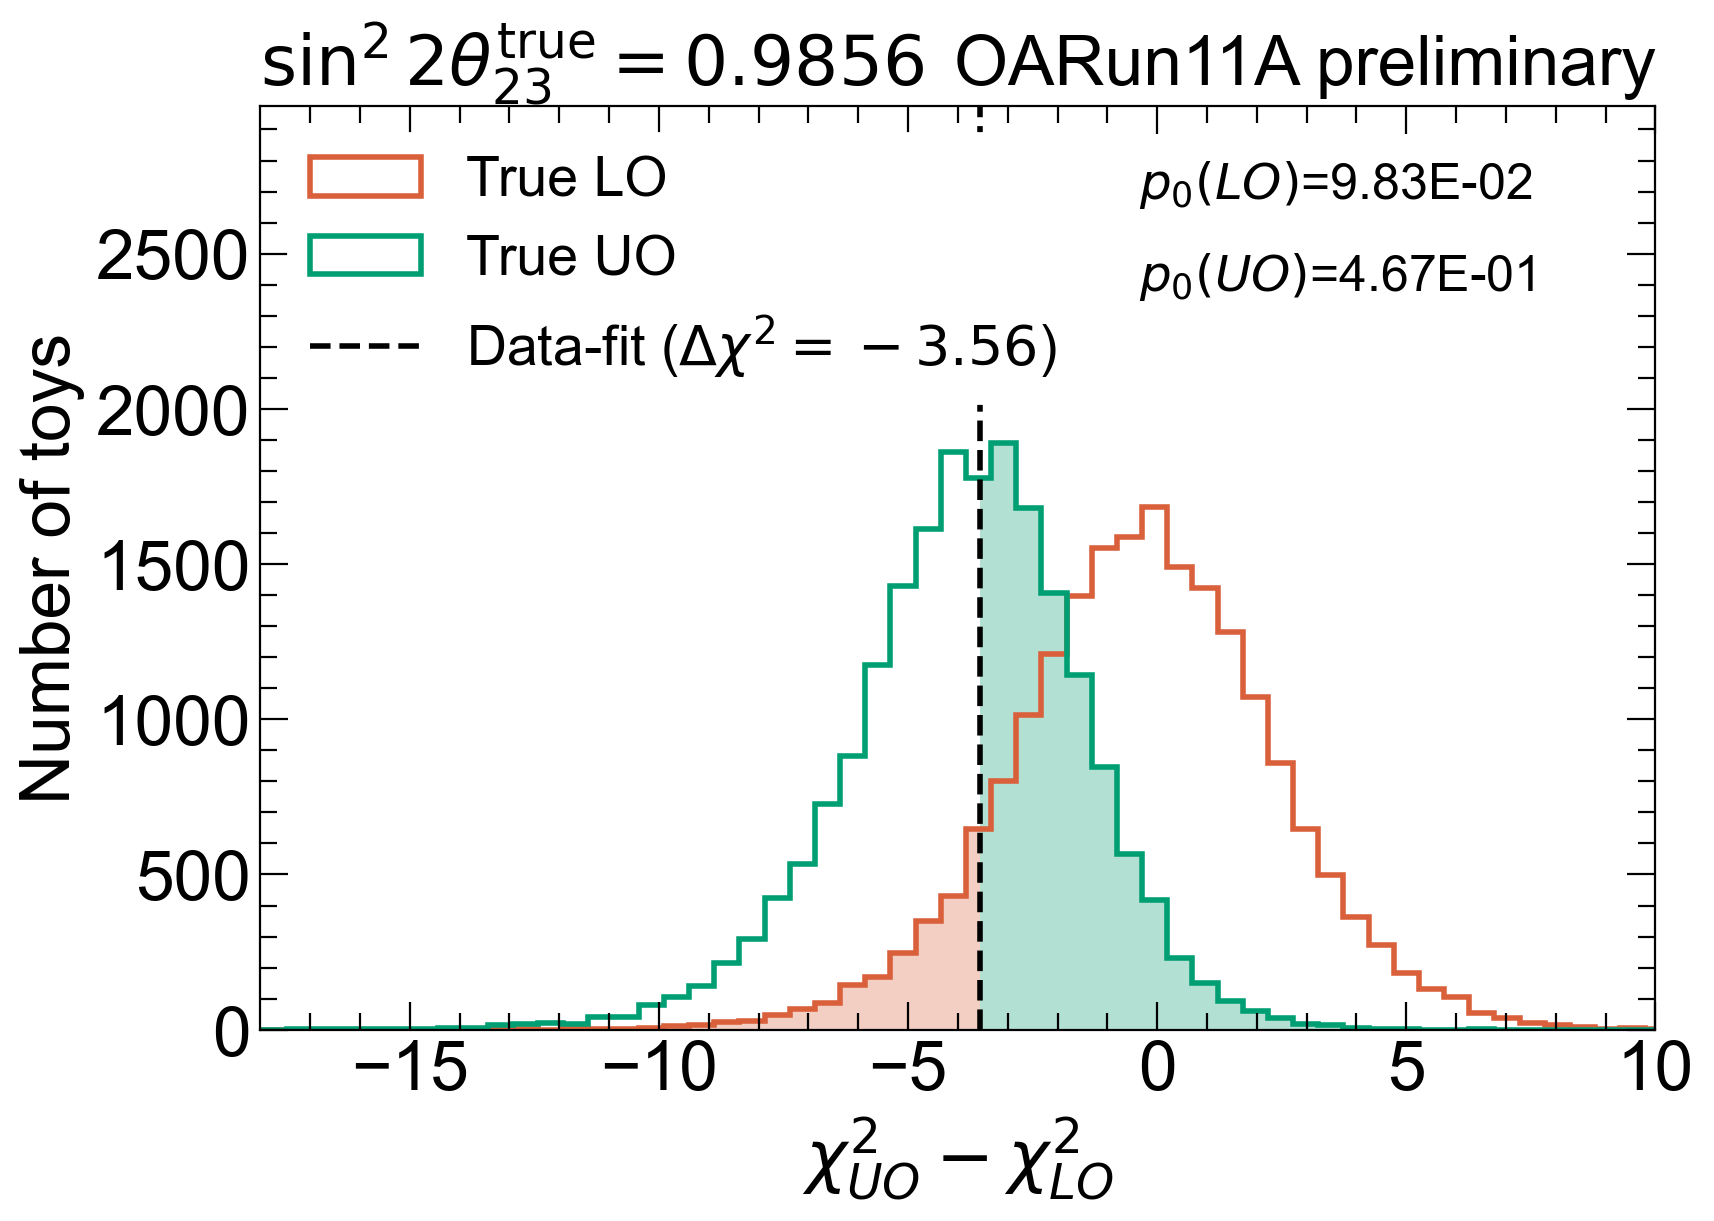

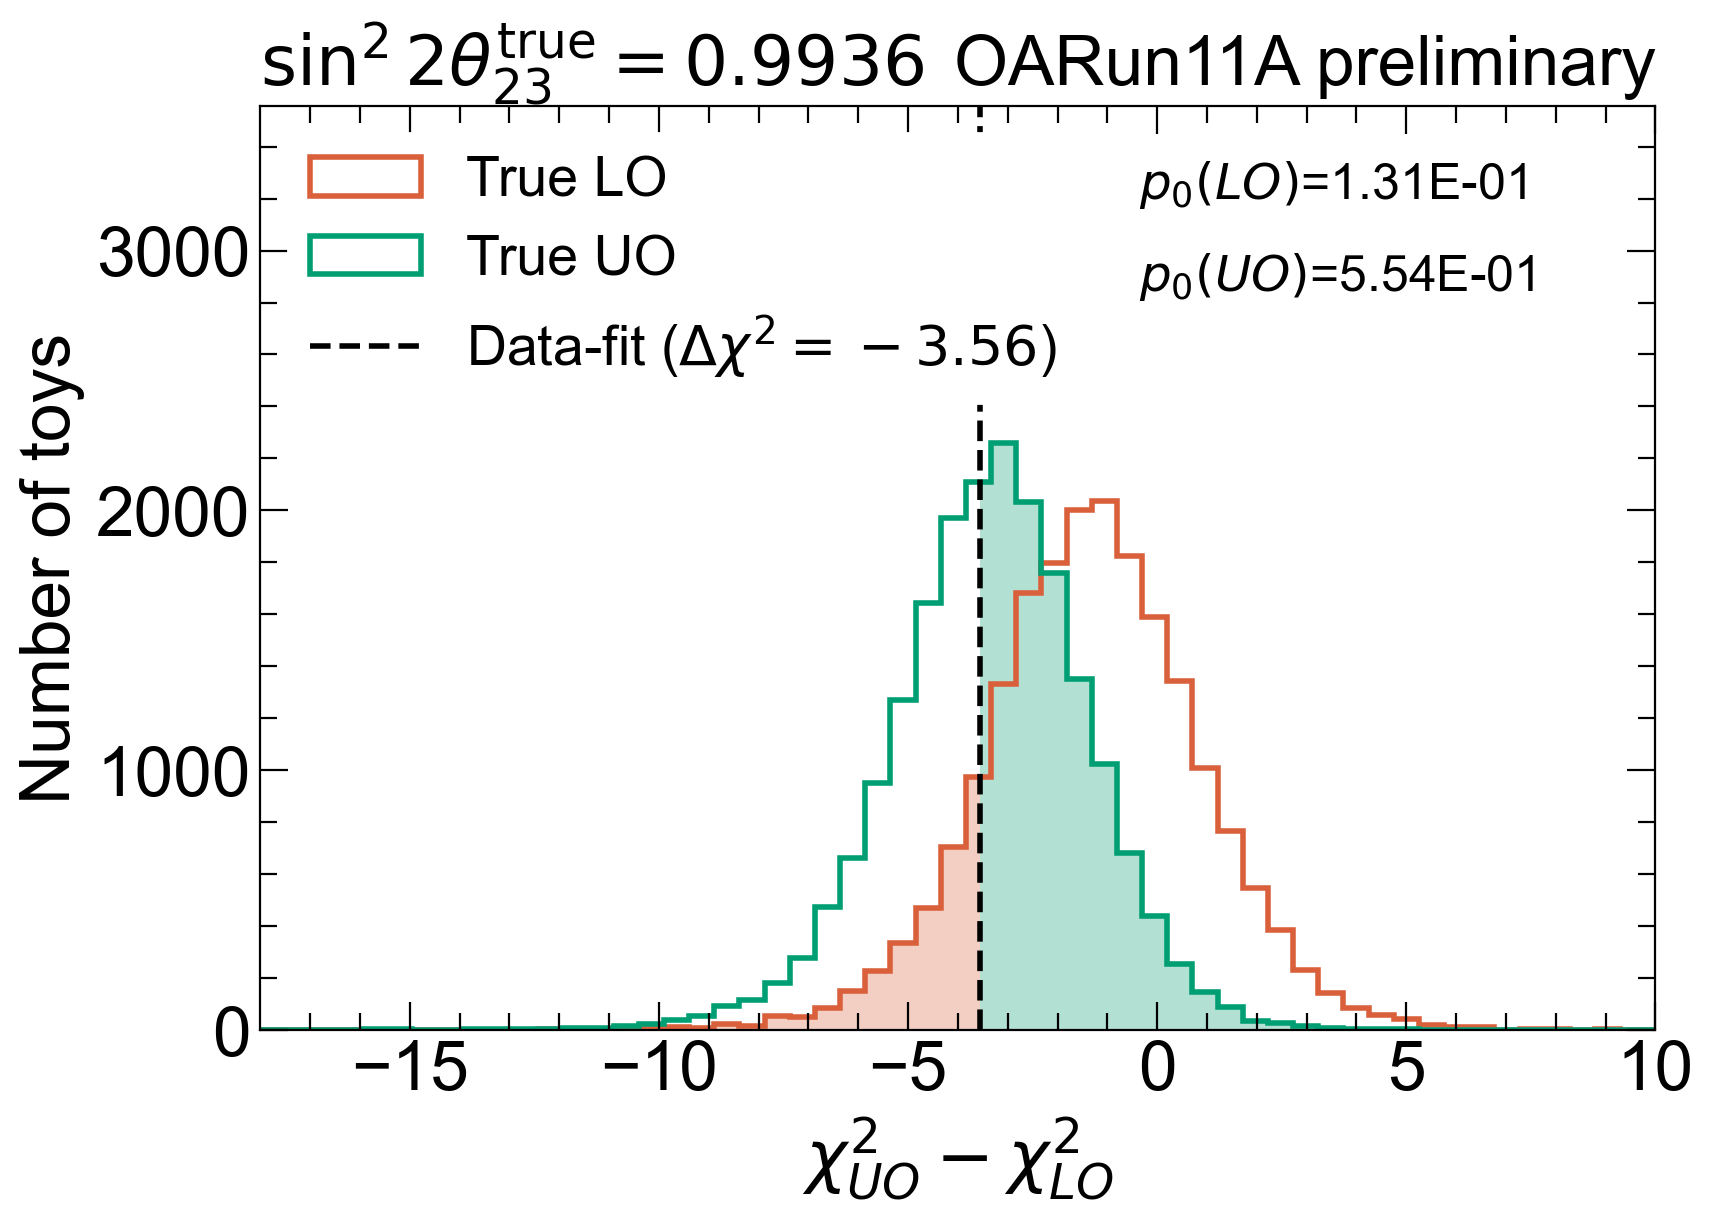

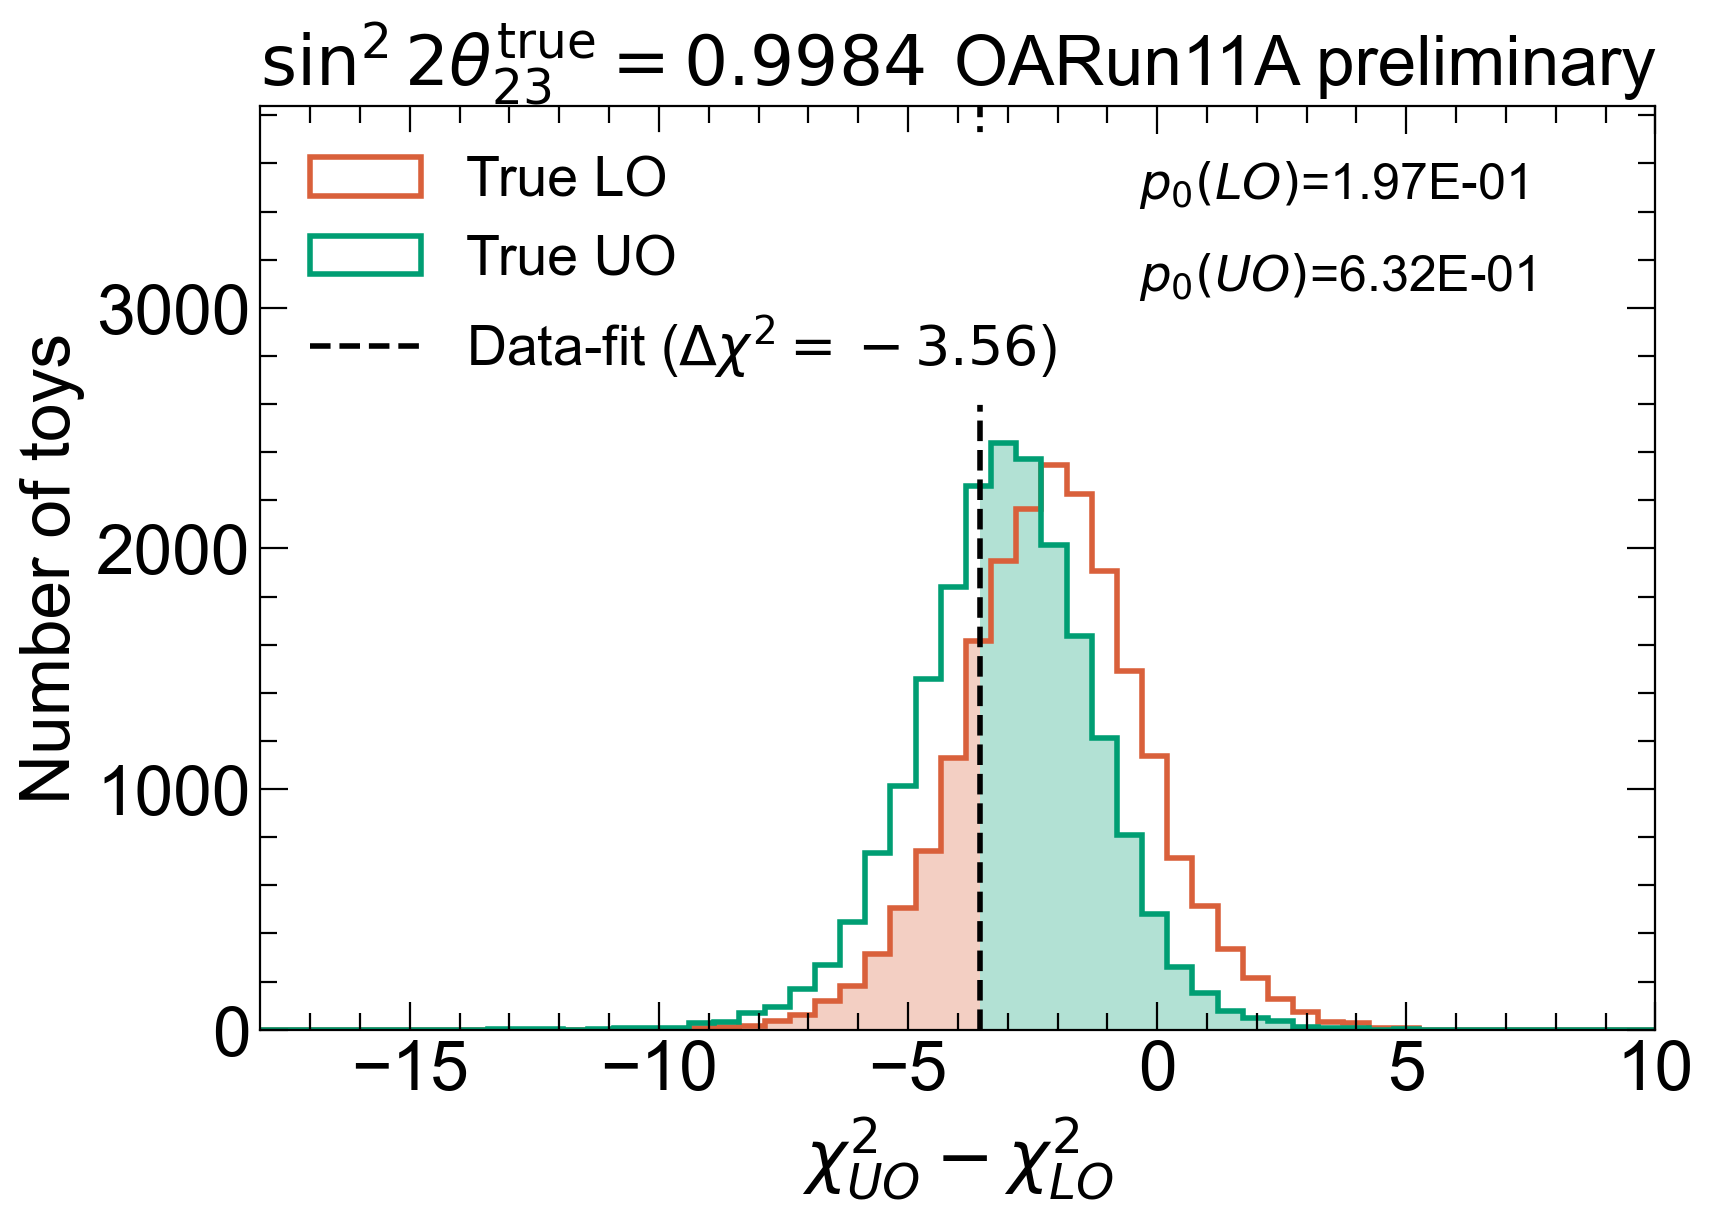

In [88]:

octant_pairs = [[0.42, 0.58], [0.44, 0.56], [0.46, 0.54], [0.48, 0.52]]
prof = False
prior = 's2223'
io_over_no_ratio = np.exp(-2.97)# Taken from MO studies (upper cells)

for octant_pair in octant_pairs:
    base_dir_toys_true_lo_no = base_dir_toys_true_lo_no_fixed.format(sin223=octant_pair[0])
    base_dir_toys_true_lo_io = base_dir_toys_true_lo_io_fixed.format(sin223=octant_pair[0])
    base_dir_toys_true_uo_no = base_dir_toys_true_uo_no_fixed.format(sin223=octant_pair[1])
    base_dir_toys_true_uo_io = base_dir_toys_true_uo_io_fixed.format(sin223=octant_pair[1])

    plot_pvalues.plot_octant_dchi2_distr(base_dir_toys_true_lo_no, base_dir_toys_true_lo_io, 
                               base_dir_toys_true_uo_no, base_dir_toys_true_uo_io, 
                               io_over_no_ratio,
                               base_dir_data, octant_pair, prior, outdir_path, outdir_files_path, 
                               prof=False, save_files=True, save_pdf=True) 



#### Additional checks (impact of the priors)

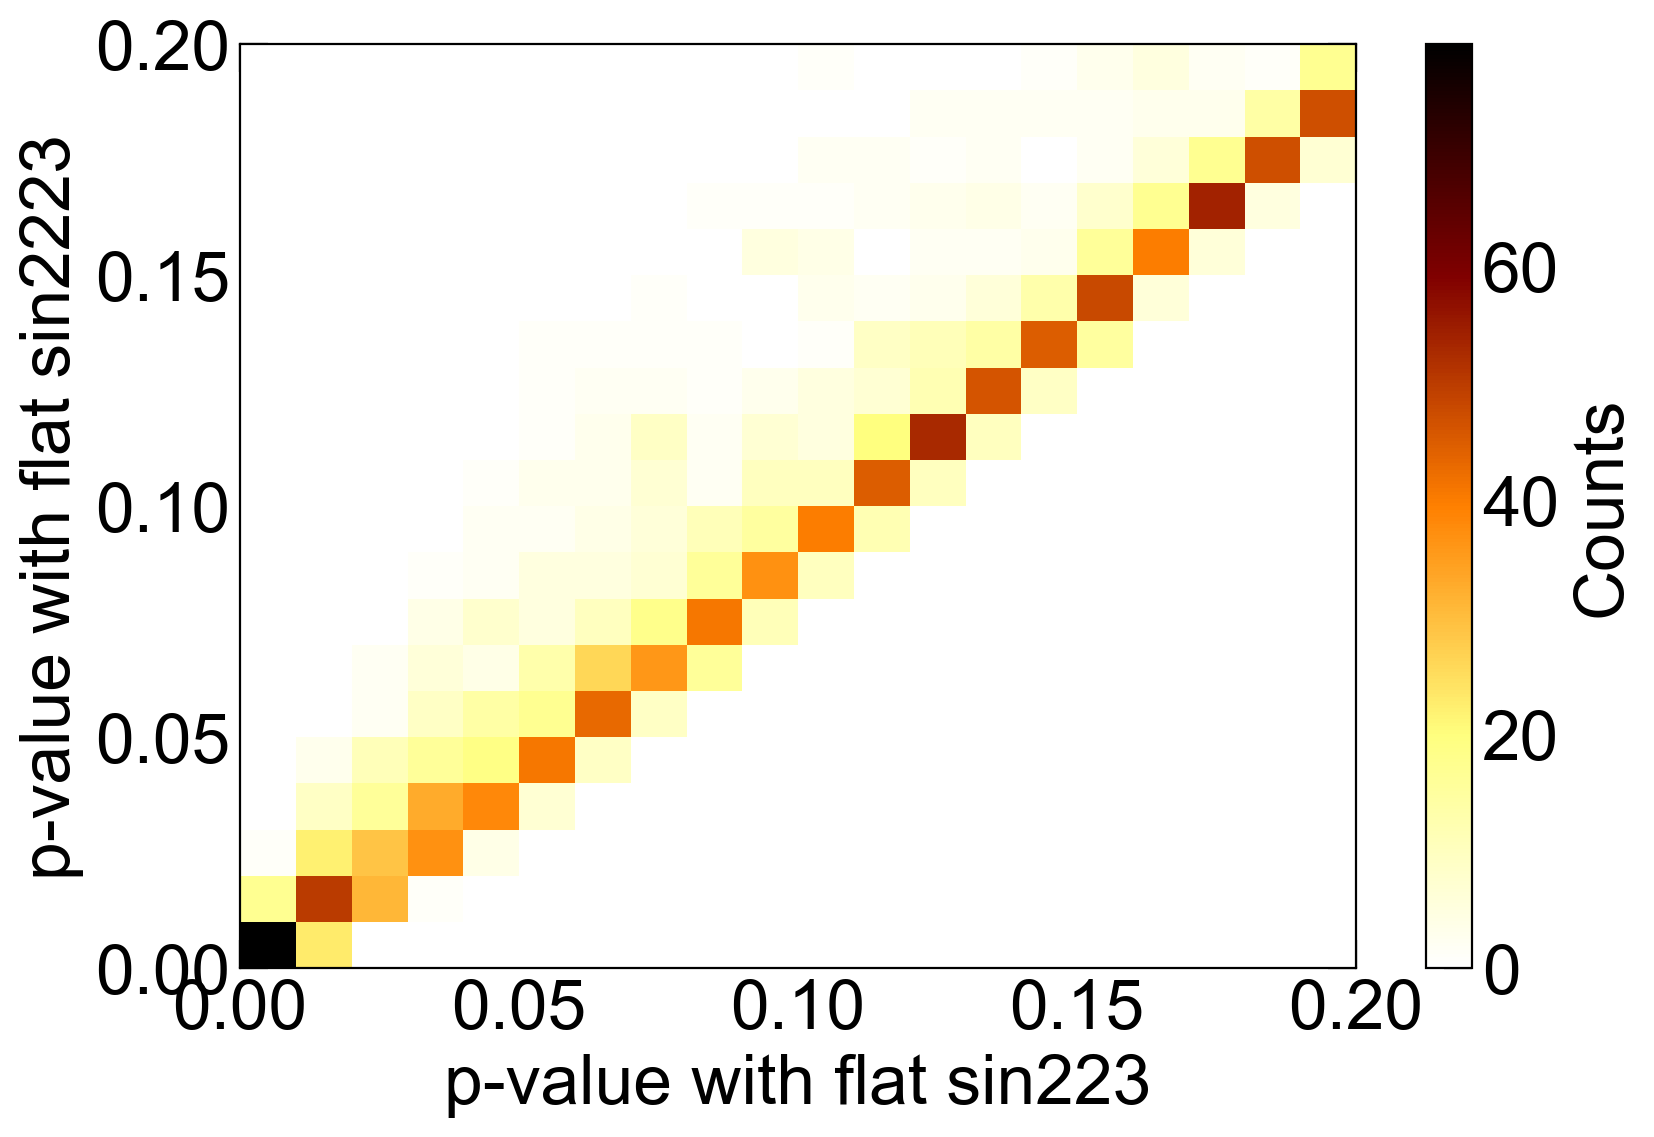

In [83]:
fig, ax = plt.subplots()

p_x = np.load(f"{outdir_files_path}/plo_forcorrtests_prof{prof}_flats223.npy")
p_y = np.load(f"{outdir_files_path}/plo_forcorrtests_prof{prof}_flats2223.npy")
h = ax.hist2d(p_x, p_y, cmap=rev_afmhot, bins=100)
plt.colorbar(h[3], label='Counts')

ax.set_xlabel('p-value with flat sin223')
ax.set_ylabel('p-value with flat sin2223')
ax.set_xlim(0, 0.2)
ax.set_ylim(0, 0.2)
show_minor_ticks(ax)
fig.savefig(f'{outdir_files_path}/pvalues_correlations.pdf', bbox_inches='tight')



## CPC studies

In [41]:
levels = [sigma_to_CL(z_score) for z_score in [1, 2, 3]]
levels = levels + [0.9]
lss = ['-', '--', 'dashdot', 'dotted']
levels.sort()
labels = ['68.27%', '90.00%', '95.45%', '99.73%']

In [45]:
base_dir_data = f"{indir_path}/MargTemplates_DataFit_delta_100k_p-theta_mode_0"
base_dir_toys_true_pi_template = f"{indir_path}/FC/MargTemplates_LucileThesis_fit_FC_3.14159265359_{{true_mh}}_FullSyst_wRC_etheta_ptheta_delta/"
base_dir_toys_true_0_template = f"{indir_path}/FC/MargTemplates_LucileThesis_fit_FC_0.0_{{true_mh}}_FullSyst_wRC_etheta_ptheta_delta/"
base_dir_toys_true_cpv_template = f"{indir_path}/FC/MargTemplates_OA2023_GoF_Thesis_50k_delta_100k_GOF_truemh{{true_mh}}_mode_0"


### Plot $\Delta \chi^2 (\sin \delta_{CP})$
Helpful to illustrate the test statistics

Number of entries in 'MargTemplate': 2040.
Grid sizes: [51] for parameters ['delta']


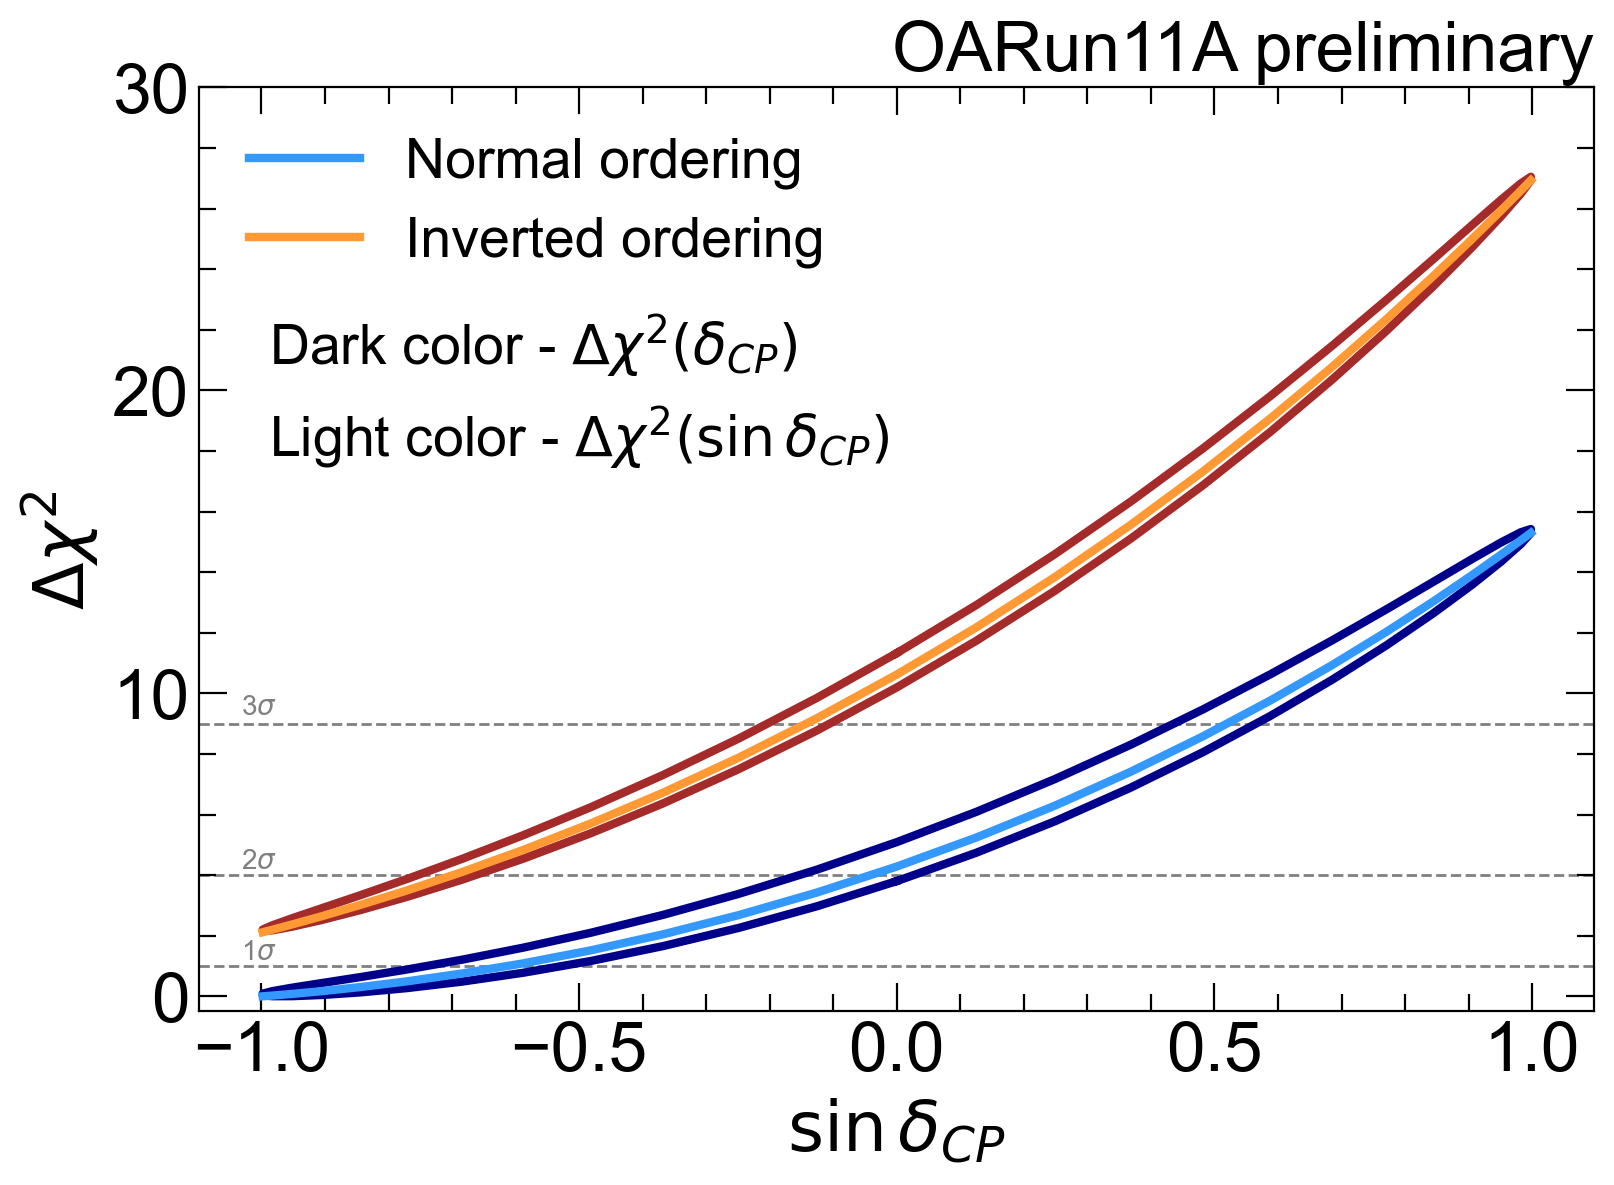

In [13]:
prefix='Datafit'
plot_pvalues.plot_dchi2_vs_sindelta(base_dir_data, prefix)

### Plot $\Delta \chi^2(\delta_{CP})$ distribution 
(Old method)

Number of entries in 'MargTemplate': 2040.
Grid sizes: [51] for parameters ['delta']
Number of entries in 'MargTemplate': 5100000.
Grid sizes: [51] for parameters ['delta']
p0=0.066, σ≈1.84
Number of entries in 'MargTemplate': 2040.
Grid sizes: [51] for parameters ['delta']
Number of entries in 'MargTemplate': 5100000.
Grid sizes: [51] for parameters ['delta']
p0=0.0263, σ≈2.22
Number of entries in 'MargTemplate': 2040.
Grid sizes: [51] for parameters ['delta']
Number of entries in 'MargTemplate': 5100000.
Grid sizes: [51] for parameters ['delta']
p0=0.00056, σ≈3.45
Number of entries in 'MargTemplate': 2040.
Grid sizes: [51] for parameters ['delta']
Number of entries in 'MargTemplate': 5100000.
Grid sizes: [51] for parameters ['delta']
p0=0.00162, σ≈3.15


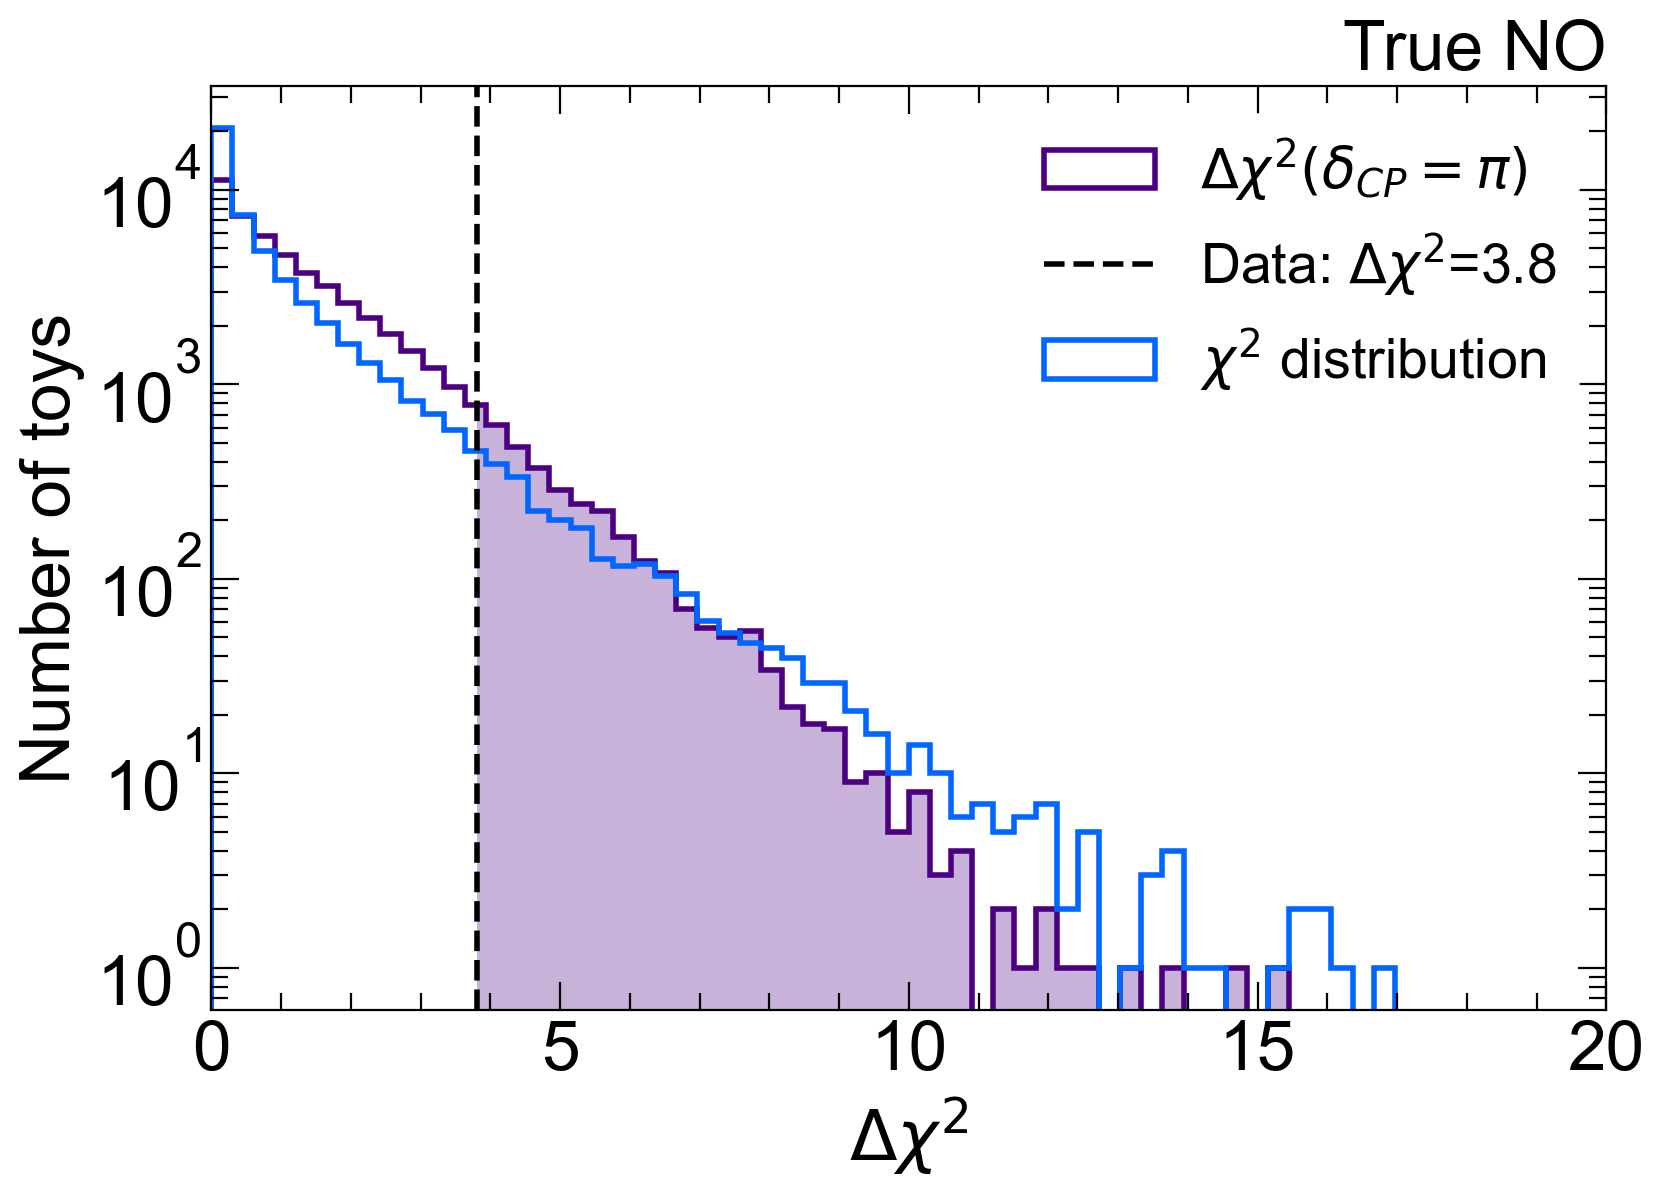

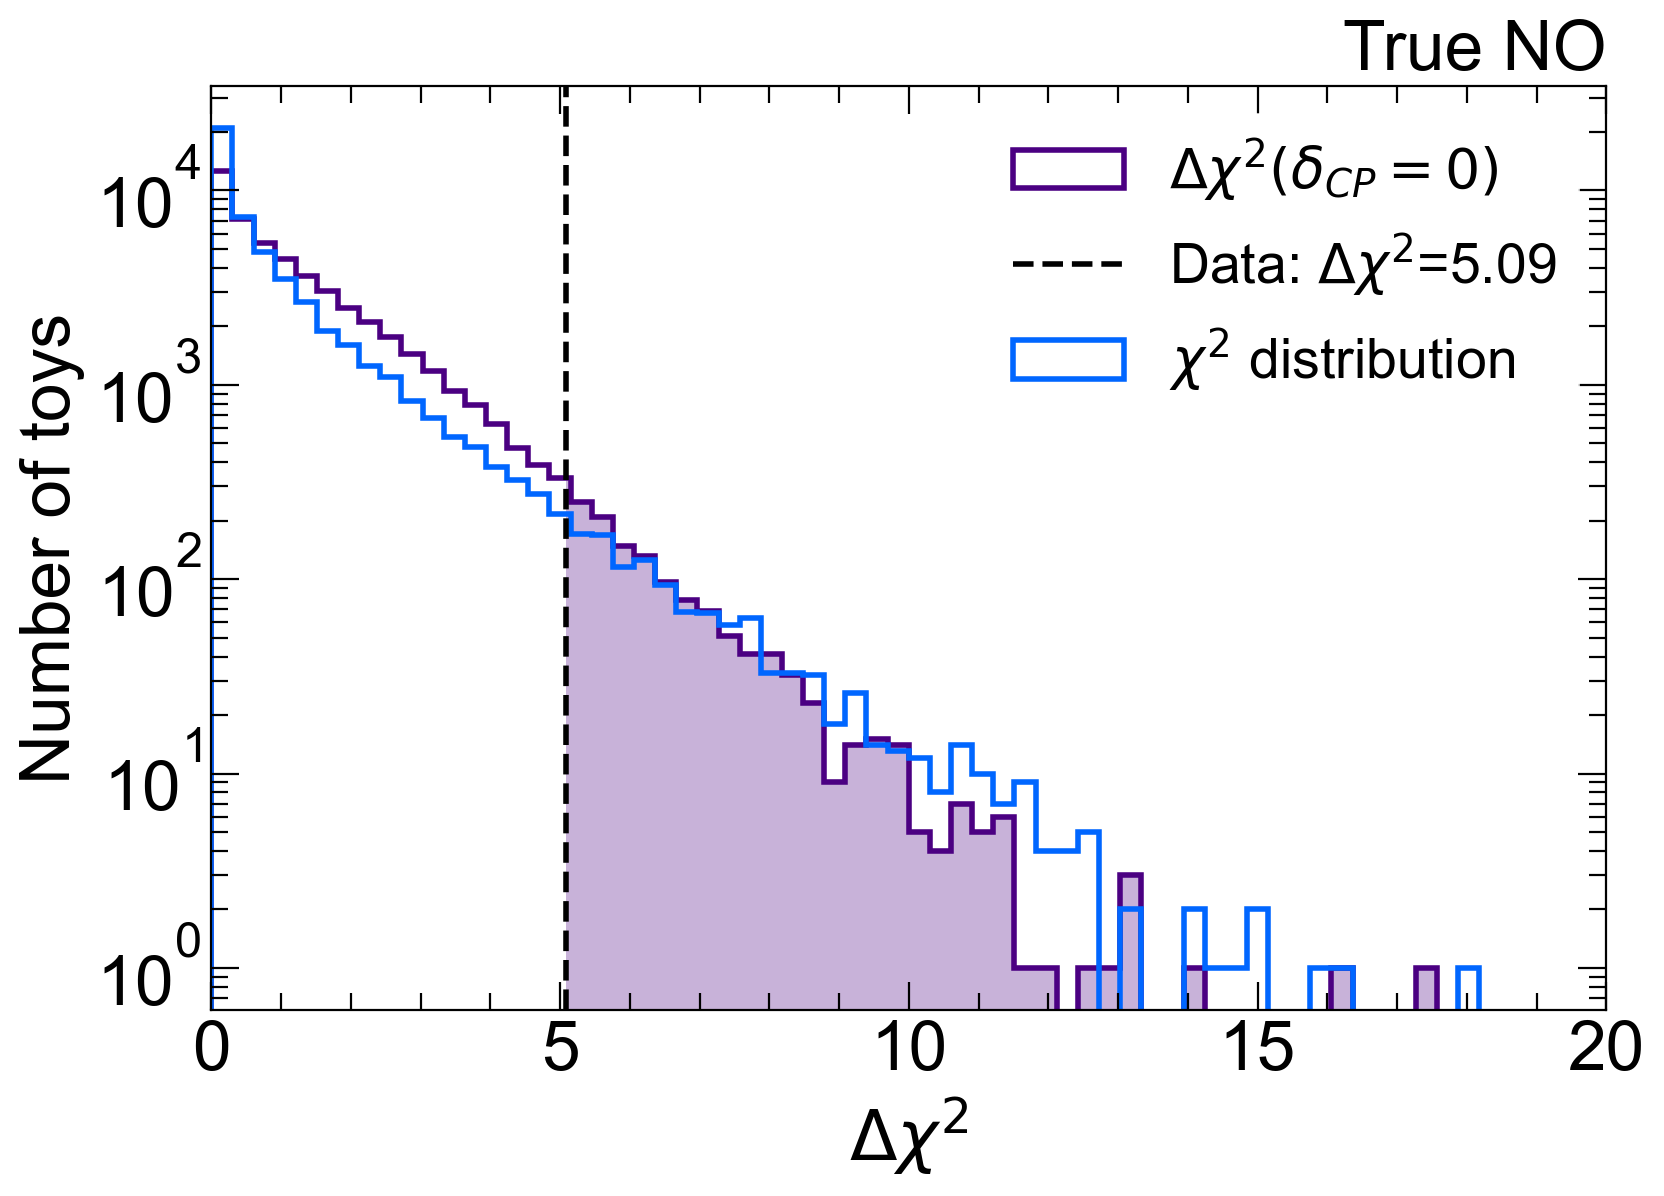

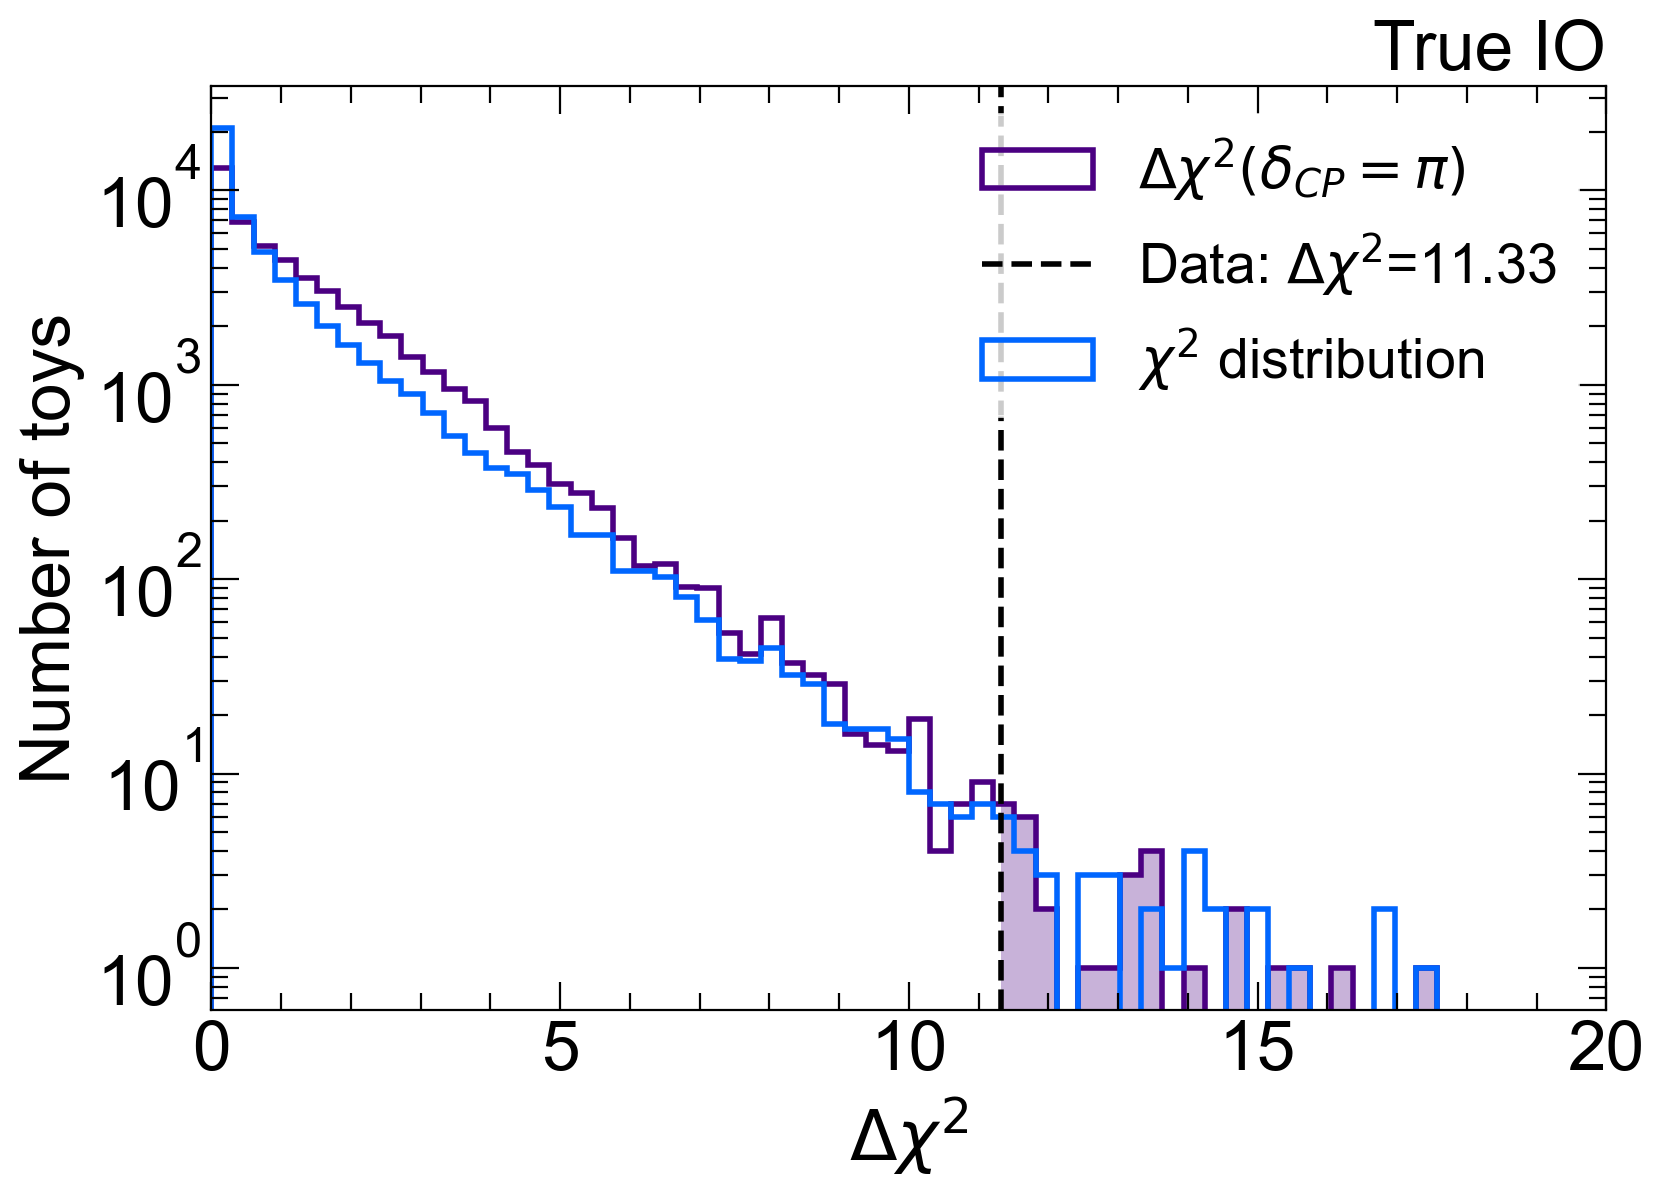

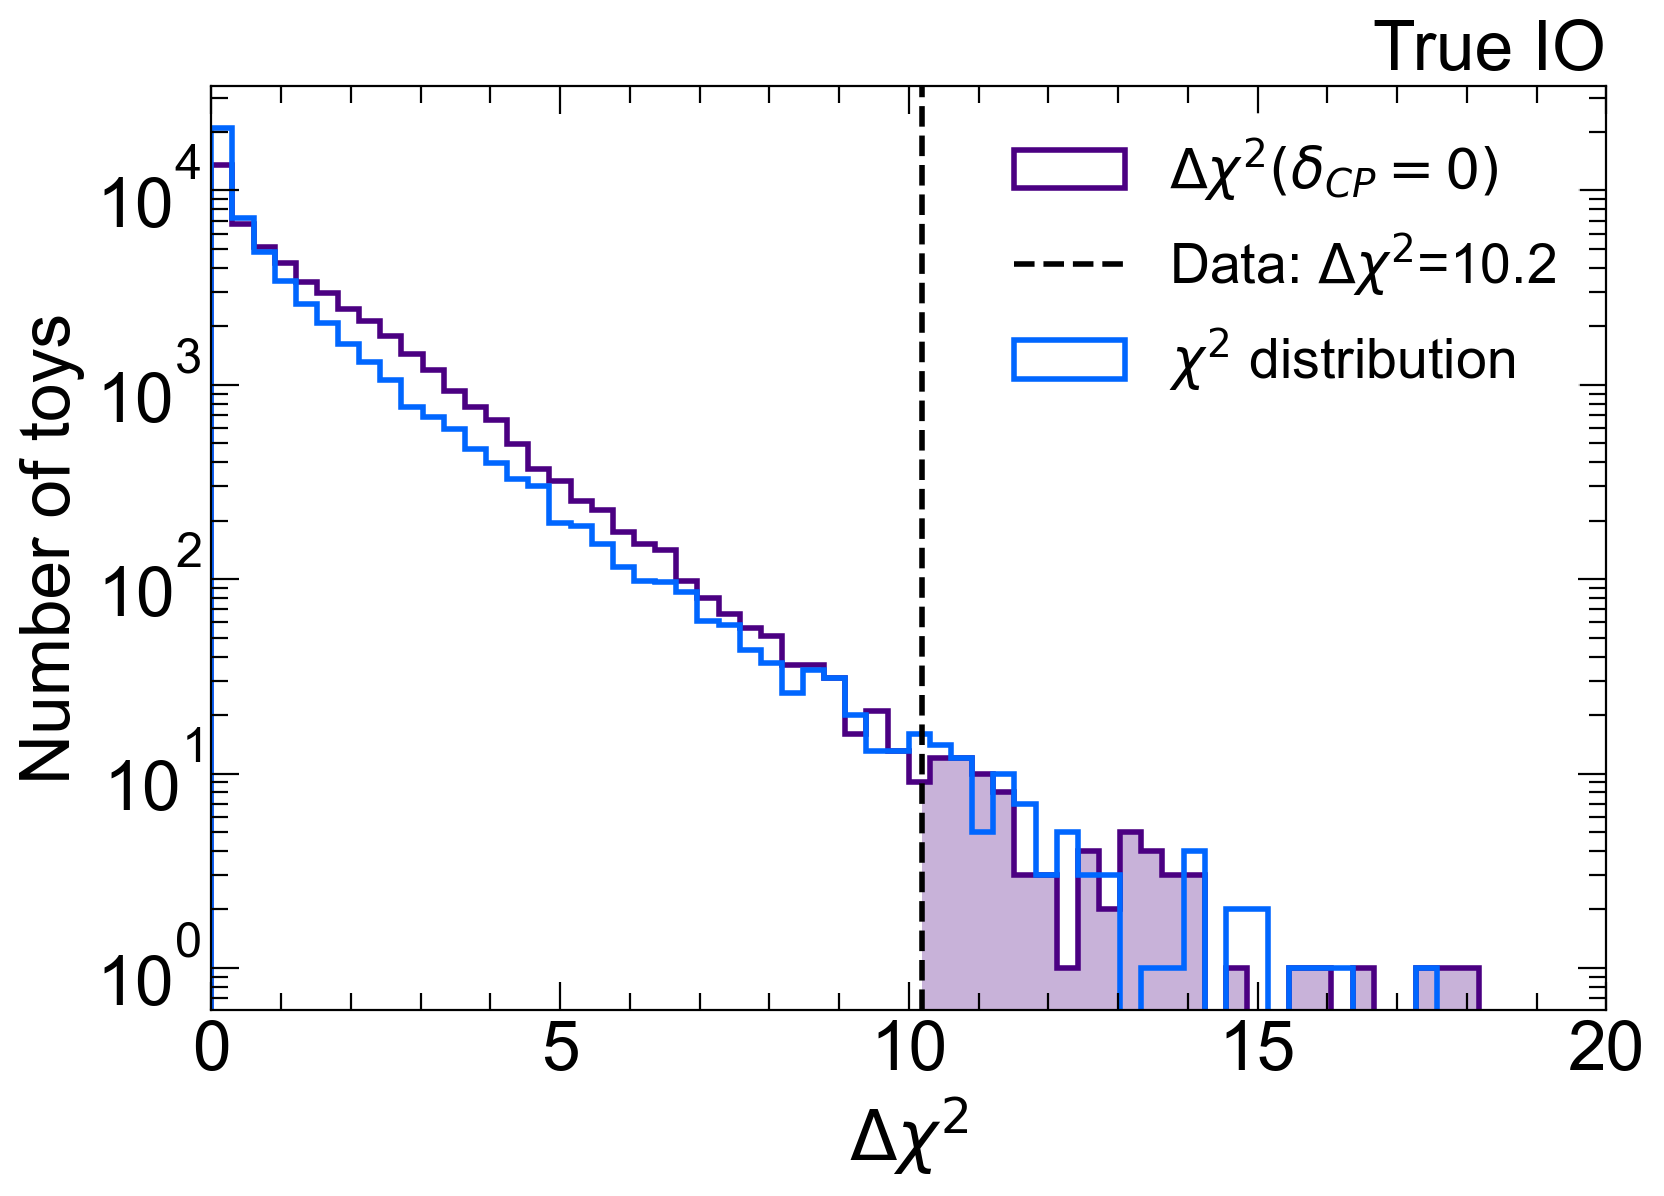

In [33]:
mode = "delta"
plot_chi2 = True

for true_mh in [0, 1]:
    base_dir_toys_true_pi = base_dir_toys_true_pi_template.format(true_mh=true_mh)
    base_dir_toys_true_0 = None

    plot_pvalues.plot_CPC_dchi2(base_dir_data, true_mh, outdir_path, mode=mode, 
                                base_dir_toys_true_pi=base_dir_toys_true_pi, base_dir_toys_true_0=base_dir_toys_true_0, plot_chi2=plot_chi2)

    base_dir_toys_true_pi = None 
    base_dir_toys_true_0 = base_dir_toys_true_0_template.format(true_mh=true_mh)

    plot_pvalues.plot_CPC_dchi2(base_dir_data, true_mh, outdir_path, mode=mode, 
                                base_dir_toys_true_pi=base_dir_toys_true_pi, base_dir_toys_true_0=base_dir_toys_true_0, plot_chi2=plot_chi2)

### Plot $\Delta \chi^2(\sin \delta_{CP})$ distribution

Number of entries in 'MargTemplate': 2040.
Grid sizes: [51] for parameters ['delta']
Number of entries in 'MargTemplate': 2040.
Grid sizes: [51] for parameters ['delta']
Number of entries in 'MargTemplate': 5100000.
Grid sizes: [51] for parameters ['delta']
Number of entries in 'MargTemplate': 5100000.
Grid sizes: [51] for parameters ['delta']
Number of entries in 'MargTemplate': 5100000.
Grid sizes: [51] for parameters ['delta']
nsigmas CPC=2.10, CPV=0.29
Number of entries in 'MargTemplate': 2040.
Grid sizes: [51] for parameters ['delta']
Number of entries in 'MargTemplate': 5100000.
Grid sizes: [51] for parameters ['delta']
Number of entries in 'MargTemplate': 5100000.
Grid sizes: [51] for parameters ['delta']
Number of entries in 'MargTemplate': 5100000.
Grid sizes: [51] for parameters ['delta']
nsigmas CPC=3.34, CPV=0.06


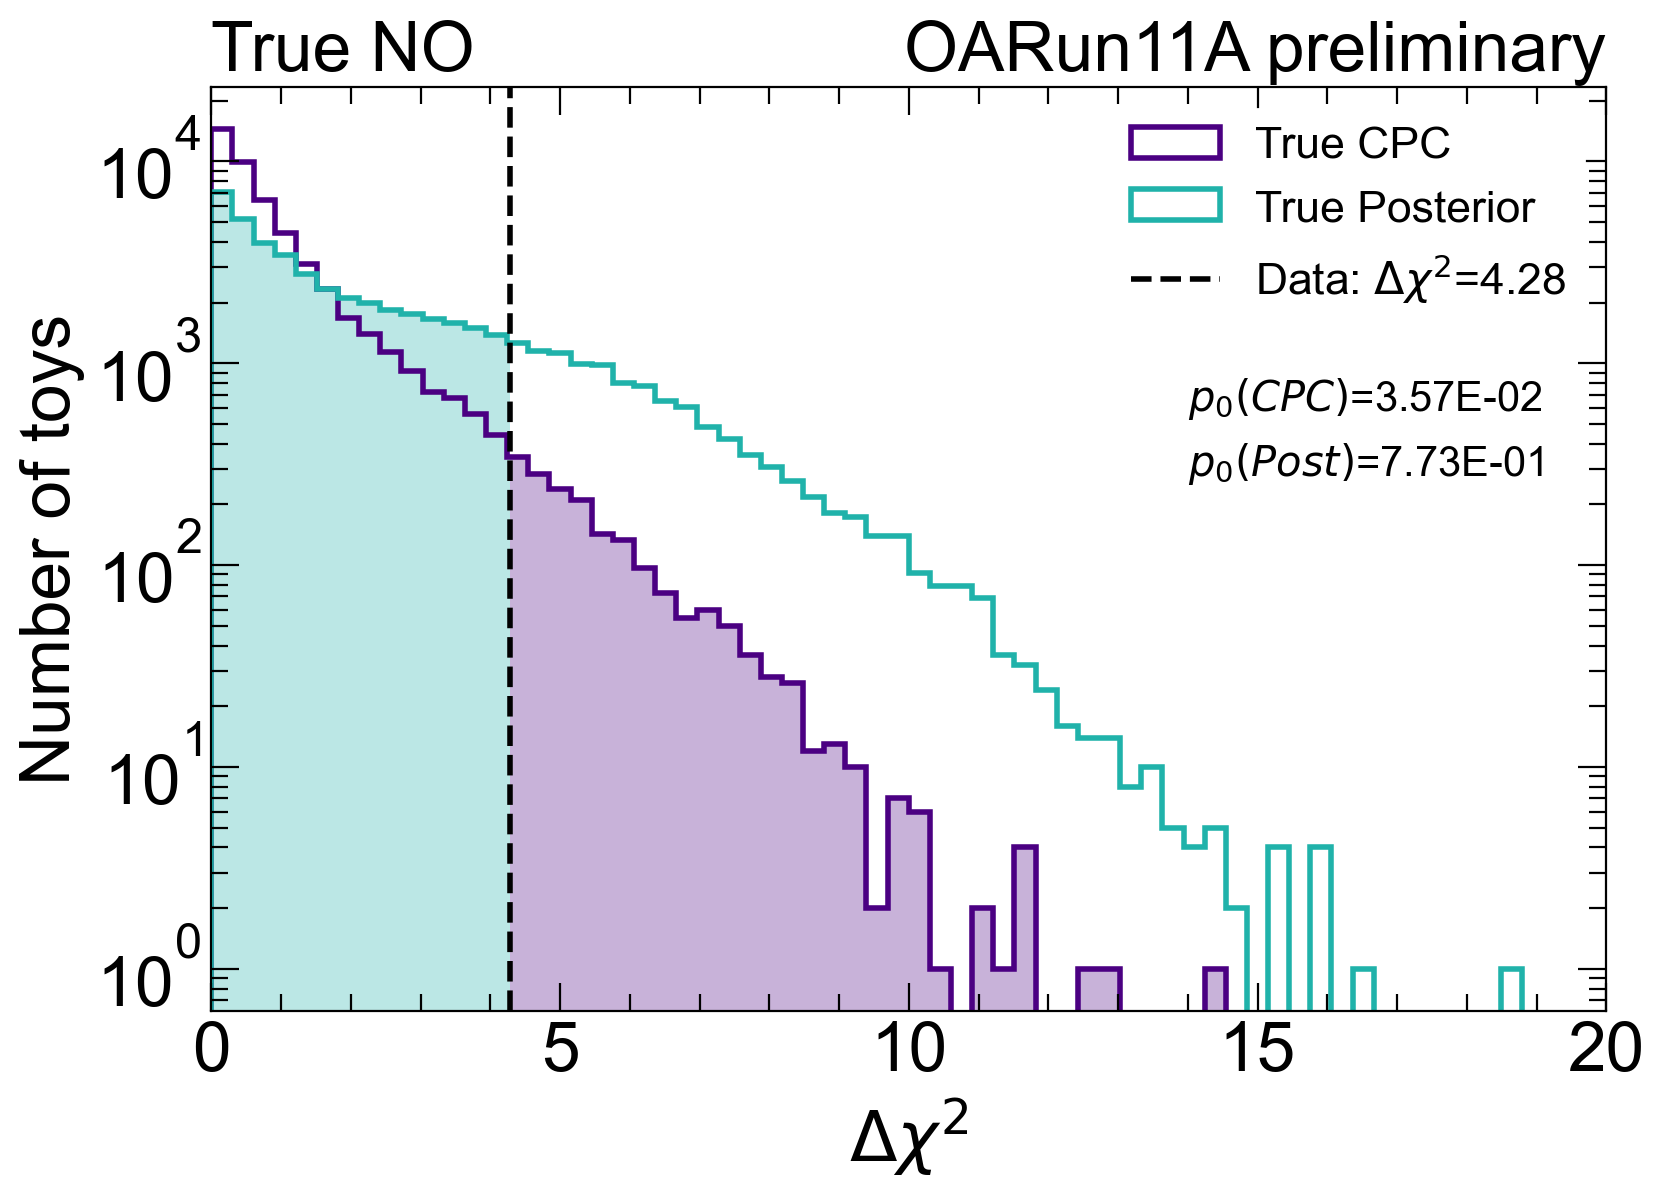

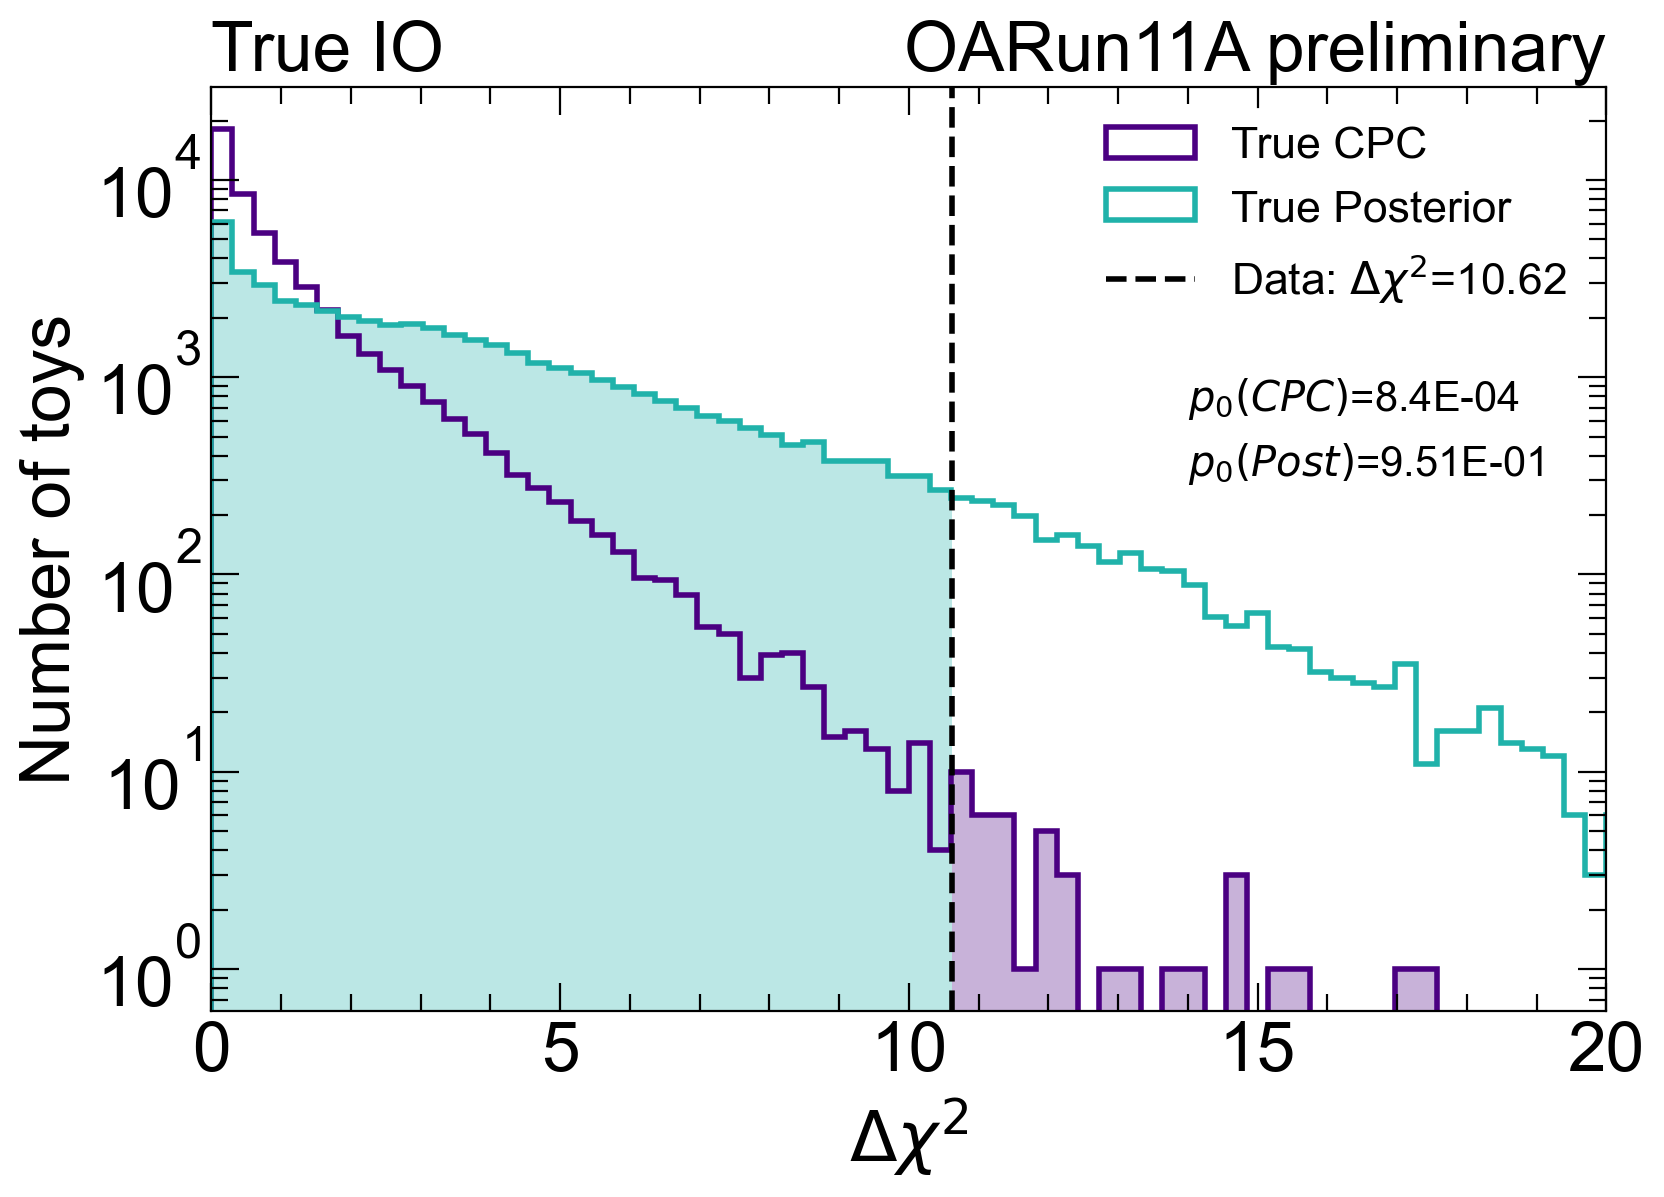

In [53]:
mode = "sindelta"
plot_chi2 = False

file_pattern = f"{base_dir_data}/marg*.root"
grid, avnllh_df, param_name = likelihood.load(file_pattern)
llh_dcp = likelihood.Loglikelihood(grid, avnllh_df, param_name)
zero_over_pi_ratio = np.exp(-(llh_dcp.dchi2[0][len(llh_dcp.dchi2[0])//2] - llh_dcp.dchi2[0][0]))

for true_mh in [0, 1]:
    base_dir_toys_true_pi = base_dir_toys_true_pi_template.format(true_mh=true_mh)
    base_dir_toys_true_0 = base_dir_toys_true_0_template.format(true_mh=true_mh)
    base_dir_toys_true_cpv = base_dir_toys_true_cpv_template.format(true_mh=true_mh)
    plot_pvalues.plot_CPC_dchi2(base_dir_data, true_mh, outdir_path, mode=mode, 
                                base_dir_toys_true_pi=base_dir_toys_true_pi, base_dir_toys_true_0=base_dir_toys_true_0, 
                                base_dir_toys_true_cpv=base_dir_toys_true_cpv,
                                zero_over_pi_ratio=zero_over_pi_ratio, plot_chi2=plot_chi2)
